Note: this analysis is for 13/2 and 13/3 -- seeding from low temp cache snapshots

## Get states for each work trajectory for A42T

In [1]:
import math
from simtk import unit
import os
import tempfile
import pickle
import mdtraj as md
import numpy as np
from simtk.unit.quantity import Quantity
import logging

# Set up logger
_logger = logging.getLogger()
_logger.setLevel(logging.INFO)

from matplotlib import pyplot as plt
from simtk.openmm import app
from tqdm import tqdm
import argparse
import random
from simtk.openmm.app import Modeller
import seaborn as sns


In [2]:
# Get dihedrals
def get_dihedrals(i, phase, outdir, htf, dihedral_indices_new, dihedral_indices_old):
    # Get topology with solute only
    modeller = Modeller(htf._topology_proposal.new_topology, htf.new_positions(htf.hybrid_positions))
#     modeller.deleteWater()
    new_top = md.Topology.from_openmm(modeller.topology)
    
    # Get last positions from eq positions of each cycle (positions are solute only)
    from tqdm import tqdm
    all_pos_forward = []
    all_pos_reverse = []
    for j in tqdm(range(100)):
        try:
            with open(os.path.join(outdir, f"{i}_{phase}_{j}_forward_neq_new.npy"), "rb") as f:
                all_pos_forward.append(np.load(f)[-1])
        except FileNotFoundError:
            pass
        try:
            with open(os.path.join(outdir, f"{i}_{phase}_{j}_reverse_neq_new.npy"), "rb") as f:
                all_pos_reverse.append(np.load(f)[0])
        except FileNotFoundError:
            pass
    print(f"new files found: {len(all_pos_forward)}")
    
    # Compute dihedrals
    traj = md.Trajectory(np.array(all_pos_forward), new_top)
    dihedrals_forward = md.compute_dihedrals(traj, np.array([dihedral_indices_new]))
    traj = md.Trajectory(np.array(all_pos_reverse), new_top)
    dihedrals_reverse = md.compute_dihedrals(traj, np.array([dihedral_indices_new]))
    
    return dihedrals_forward, dihedrals_reverse

In [78]:
# Get dihedrals
def get_dihedrals_old(i, phase, outdir, htf, dihedral_indices_new, dihedral_indices_old):
    # Get topology with solute only
    modeller = Modeller(htf._topology_proposal.old_topology, htf.old_positions(htf.hybrid_positions))
#     modeller.deleteWater()
    old_top = md.Topology.from_openmm(modeller.topology)
    
    # Get last positions from eq positions of each cycle (positions are solute only)
    from tqdm import tqdm
    all_pos_forward = []
    all_pos_reverse = []
    for j in tqdm(range(100)):
        try:
            with open(os.path.join(outdir, f"{i}_{phase}_{j}_forward_neq_old.npy"), "rb") as f:
                all_pos_forward.append(np.load(f)[0])
        except FileNotFoundError:
            pass
        try:
            with open(os.path.join(outdir, f"{i}_{phase}_{j}_reverse_neq_old.npy"), "rb") as f:
                all_pos_reverse.append(np.load(f)[-1])
        except FileNotFoundError:
            pass
    print(f"new files found: {len(all_pos_forward)}")
    
    # Compute dihedrals
    traj = md.Trajectory(np.array(all_pos_forward), old_top)
    dihedrals_forward = md.compute_dihedrals(traj, np.array([dihedral_indices_old]))
    traj = md.Trajectory(np.array(all_pos_reverse), old_top)
    dihedrals_reverse = md.compute_dihedrals(traj, np.array([dihedral_indices_old]))
    
    return dihedrals_forward, dihedrals_reverse

#### Get dihedrals for apo

In [3]:
outdir = "/data/chodera/zhangi/perses_benchmark/neq/13/3/"
phase = "apo"
i = os.path.basename(os.path.dirname(outdir))


In [4]:
with open(os.path.join(outdir, f"{i}_{phase}.pickle"), 'rb') as f:
    htf = pickle.load(f)

DEBUG:numba.core.byteflow:bytecode dump:
>          0	NOP(arg=None, lineno=6)
           2	LOAD_GLOBAL(arg=0, lineno=6)
           4	LOAD_METHOD(arg=1, lineno=6)
           6	LOAD_CONST(arg=1, lineno=6)
           8	CALL_METHOD(arg=1, lineno=6)
          10	STORE_FAST(arg=2, lineno=6)
          12	LOAD_FAST(arg=0, lineno=7)
          14	LOAD_CONST(arg=2, lineno=7)
          16	BINARY_SUBSCR(arg=None, lineno=7)
          18	LOAD_FAST(arg=1, lineno=7)
          20	LOAD_CONST(arg=3, lineno=7)
          22	BINARY_SUBSCR(arg=None, lineno=7)
          24	BINARY_MULTIPLY(arg=None, lineno=7)
          26	LOAD_FAST(arg=0, lineno=7)
          28	LOAD_CONST(arg=3, lineno=7)
          30	BINARY_SUBSCR(arg=None, lineno=7)
          32	LOAD_FAST(arg=1, lineno=7)
          34	LOAD_CONST(arg=2, lineno=7)
          36	BINARY_SUBSCR(arg=None, lineno=7)
          38	BINARY_MULTIPLY(arg=None, lineno=7)
          40	BINARY_SUBTRACT(arg=None, lineno=7)
          42	LOAD_FAST(arg=2, lineno=7)
          44	LO

DEBUG:numba.core.byteflow:dispatch pc=74, inst=BINARY_MULTIPLY(arg=None, lineno=8)
DEBUG:numba.core.byteflow:stack ['$60binary_multiply.27', '$66binary_subscr.30', '$72binary_subscr.33']
DEBUG:numba.core.byteflow:dispatch pc=76, inst=BINARY_SUBTRACT(arg=None, lineno=8)
DEBUG:numba.core.byteflow:stack ['$60binary_multiply.27', '$74binary_multiply.34']
DEBUG:numba.core.byteflow:dispatch pc=78, inst=LOAD_FAST(arg=2, lineno=8)
DEBUG:numba.core.byteflow:stack ['$76binary_subtract.35']
DEBUG:numba.core.byteflow:dispatch pc=80, inst=LOAD_CONST(arg=2, lineno=8)
DEBUG:numba.core.byteflow:stack ['$76binary_subtract.35', '$c78.36']
DEBUG:numba.core.byteflow:dispatch pc=82, inst=STORE_SUBSCR(arg=None, lineno=8)
DEBUG:numba.core.byteflow:stack ['$76binary_subtract.35', '$c78.36', '$const80.37']
DEBUG:numba.core.byteflow:dispatch pc=84, inst=LOAD_FAST(arg=0, lineno=9)
DEBUG:numba.core.byteflow:stack []
DEBUG:numba.core.byteflow:dispatch pc=86, inst=LOAD_CONST(arg=4, lineno=9)
DEBUG:numba.core.bytefl

DEBUG:numba.core.ssa:==== SSA block analysis pass on 0
DEBUG:numba.core.ssa:Running <numba.core.ssa._GatherDefsHandler object at 0x2adb6ebaf450>
DEBUG:numba.core.ssa:on stmt: a = arg(0, name=a)
DEBUG:numba.core.ssa:on stmt: b = arg(1, name=b)
DEBUG:numba.core.ssa:on stmt: $2load_global.0 = global(np: <module 'numpy' from '/home/zhangi/miniconda3/envs/perses-sims-oct2020/lib/python3.7/site-packages/numpy/__init__.py'>)
DEBUG:numba.core.ssa:on stmt: $4load_method.1 = getattr(value=$2load_global.0, attr=zeros)
DEBUG:numba.core.ssa:on stmt: $const6.2 = const(int, 3)
DEBUG:numba.core.ssa:on stmt: $8call_method.3 = call $4load_method.1($const6.2, func=$4load_method.1, args=[Var($const6.2, coordinate_numba.py:6)], kws=(), vararg=None)
DEBUG:numba.core.ssa:on stmt: c = $8call_method.3
DEBUG:numba.core.ssa:on stmt: $const14.5 = const(int, 1)
DEBUG:numba.core.ssa:on stmt: $16binary_subscr.6 = static_getitem(value=a, index=1, index_var=$const14.5)
DEBUG:numba.core.ssa:on stmt: $const20.8 = const(

DEBUG:numba.core.byteflow:pending: deque([State(pc_initial=0 nstack_initial=0)])
DEBUG:numba.core.byteflow:stack: []
DEBUG:numba.core.byteflow:dispatch pc=0, inst=NOP(arg=None, lineno=14)
DEBUG:numba.core.byteflow:stack []
DEBUG:numba.core.byteflow:dispatch pc=2, inst=LOAD_GLOBAL(arg=0, lineno=14)
DEBUG:numba.core.byteflow:stack []
DEBUG:numba.core.byteflow:dispatch pc=4, inst=LOAD_METHOD(arg=1, lineno=14)
DEBUG:numba.core.byteflow:stack ['$2load_global.0']
DEBUG:numba.core.byteflow:dispatch pc=6, inst=LOAD_FAST(arg=0, lineno=14)
DEBUG:numba.core.byteflow:stack ['$4load_method.1']
DEBUG:numba.core.byteflow:dispatch pc=8, inst=LOAD_FAST(arg=0, lineno=14)
DEBUG:numba.core.byteflow:stack ['$4load_method.1', '$a6.2']
DEBUG:numba.core.byteflow:dispatch pc=10, inst=CALL_METHOD(arg=2, lineno=14)
DEBUG:numba.core.byteflow:stack ['$4load_method.1', '$a6.2', '$a8.3']
DEBUG:numba.core.byteflow:dispatch pc=12, inst=STORE_FAST(arg=1, lineno=14)
DEBUG:numba.core.byteflow:stack ['$10call_method.4']
D

DEBUG:numba.core.byteflow:stack ['$6unpack_sequence.2']
DEBUG:numba.core.byteflow:dispatch pc=10, inst=LOAD_FAST(arg=1, lineno=509)
DEBUG:numba.core.byteflow:stack []
DEBUG:numba.core.byteflow:dispatch pc=12, inst=LOAD_ATTR(arg=0, lineno=509)
DEBUG:numba.core.byteflow:stack ['$b10.4']
DEBUG:numba.core.byteflow:dispatch pc=14, inst=UNPACK_SEQUENCE(arg=1, lineno=509)
DEBUG:numba.core.byteflow:stack ['$12load_attr.5']
DEBUG:numba.core.byteflow:dispatch pc=16, inst=STORE_FAST(arg=3, lineno=509)
DEBUG:numba.core.byteflow:stack ['$14unpack_sequence.6']
DEBUG:numba.core.byteflow:dispatch pc=18, inst=LOAD_FAST(arg=2, lineno=510)
DEBUG:numba.core.byteflow:stack []
DEBUG:numba.core.byteflow:dispatch pc=20, inst=LOAD_FAST(arg=3, lineno=510)
DEBUG:numba.core.byteflow:stack ['$m18.8']
DEBUG:numba.core.byteflow:dispatch pc=22, inst=COMPARE_OP(arg=3, lineno=510)
DEBUG:numba.core.byteflow:stack ['$m18.8', '$n20.9']
DEBUG:numba.core.byteflow:dispatch pc=24, inst=POP_JUMP_IF_FALSE(arg=34, lineno=510)
DE

DEBUG:numba.core.ssa:on stmt: <static> raise <class 'ValueError'>('incompatible array sizes for np.dot(a, b) (vector * vector)')
DEBUG:numba.core.ssa:==== SSA block analysis pass on 34
DEBUG:numba.core.ssa:Running <numba.core.ssa._GatherDefsHandler object at 0x2adb6ee067d0>
DEBUG:numba.core.ssa:on stmt: $const34.0 = const(NoneType, None)
DEBUG:numba.core.ssa:on stmt: $36return_value.1 = cast(value=$const34.0)
DEBUG:numba.core.ssa:on stmt: return $36return_value.1
DEBUG:numba.core.ssa:defs defaultdict(<class 'list'>,
            {'$12load_attr.5': [<numba.core.ir.Assign object at 0x2adb6ee16410>],
             '$14unpack_sequence.6': [<numba.core.ir.Assign object at 0x2adb6ee165d0>],
             '$14unpack_sequence.7': [<numba.core.ir.Assign object at 0x2adb6ee164d0>],
             '$22compare_op.10': [<numba.core.ir.Assign object at 0x2adb6ee16910>],
             '$24pred': [<numba.core.ir.Assign object at 0x2adb6ee16b50>],
             '$26load_global.0': [<numba.core.ir.Assign objec

DEBUG:numba.core.ssa:on stmt: $const12.1 = const(str, array size too large to fit in C int)
DEBUG:numba.core.ssa:on stmt: $14call_function.2 = call $10load_global.0($const12.1, func=$10load_global.0, args=[Var($const12.1, linalg.py:309)], kws=(), vararg=None)
DEBUG:numba.core.ssa:on stmt: <static> raise <class 'OverflowError'>('array size too large to fit in C int')
DEBUG:numba.core.ssa:==== SSA block analysis pass on 18
DEBUG:numba.core.ssa:Running <numba.core.ssa._GatherDefsHandler object at 0x2adb6eeb8810>
DEBUG:numba.core.ssa:on stmt: $const18.0 = const(NoneType, None)
DEBUG:numba.core.ssa:on stmt: $20return_value.1 = cast(value=$const18.0)
DEBUG:numba.core.ssa:on stmt: return $20return_value.1
DEBUG:numba.core.ssa:defs defaultdict(<class 'list'>,
            {'$10load_global.0': [<numba.core.ir.Assign object at 0x2adb6eec0350>],
             '$14call_function.2': [<numba.core.ir.Assign object at 0x2adb6eec0590>],
             '$20return_value.1': [<numba.core.ir.Assign object at 0

DEBUG:numba.core.byteflow:pending: deque([State(pc_initial=0 nstack_initial=0)])
DEBUG:numba.core.byteflow:stack: []
DEBUG:numba.core.byteflow:dispatch pc=0, inst=NOP(arg=None, lineno=22)
DEBUG:numba.core.byteflow:stack []
DEBUG:numba.core.byteflow:dispatch pc=2, inst=LOAD_GLOBAL(arg=0, lineno=22)
DEBUG:numba.core.byteflow:stack []
DEBUG:numba.core.byteflow:dispatch pc=4, inst=LOAD_FAST(arg=0, lineno=22)
DEBUG:numba.core.byteflow:stack ['$2load_global.0']
DEBUG:numba.core.byteflow:dispatch pc=6, inst=CALL_FUNCTION(arg=1, lineno=22)
DEBUG:numba.core.byteflow:stack ['$2load_global.0', '$axis4.1']
DEBUG:numba.core.byteflow:dispatch pc=8, inst=STORE_FAST(arg=2, lineno=22)
DEBUG:numba.core.byteflow:stack ['$6call_function.2']
DEBUG:numba.core.byteflow:end state. edges=[Edge(pc=10, stack=(), blockstack=(), npush=0)]
DEBUG:numba.core.byteflow:pending: deque([State(pc_initial=10 nstack_initial=0)])
DEBUG:numba.core.byteflow:stack: []
DEBUG:numba.core.byteflow:dispatch pc=10, inst=SETUP_LOOP(ar

DEBUG:numba.core.byteflow:dispatch pc=96, inst=LOAD_FAST(arg=5, lineno=31)
DEBUG:numba.core.byteflow:stack ['$cos_angle86.17', '$92binary_subscr.20', '$const94.21']
DEBUG:numba.core.byteflow:dispatch pc=98, inst=BINARY_SUBTRACT(arg=None, lineno=31)
DEBUG:numba.core.byteflow:stack ['$cos_angle86.17', '$92binary_subscr.20', '$const94.21', '$cos_angle96.22']
DEBUG:numba.core.byteflow:dispatch pc=100, inst=BINARY_MULTIPLY(arg=None, lineno=31)
DEBUG:numba.core.byteflow:stack ['$cos_angle86.17', '$92binary_subscr.20', '$98binary_subtract.23']
DEBUG:numba.core.byteflow:dispatch pc=102, inst=BINARY_ADD(arg=None, lineno=31)
DEBUG:numba.core.byteflow:stack ['$cos_angle86.17', '$100binary_multiply.24']
DEBUG:numba.core.byteflow:dispatch pc=104, inst=LOAD_FAST(arg=7, lineno=31)
DEBUG:numba.core.byteflow:stack ['$102binary_add.25']
DEBUG:numba.core.byteflow:dispatch pc=106, inst=LOAD_CONST(arg=7, lineno=31)
DEBUG:numba.core.byteflow:stack ['$102binary_add.25', '$rotation_matrix104.26']
DEBUG:numba.

DEBUG:numba.core.byteflow:stack ['$194binary_subscr.68', '$200binary_subscr.71']
DEBUG:numba.core.byteflow:dispatch pc=204, inst=LOAD_CONST(arg=6, lineno=35)
DEBUG:numba.core.byteflow:stack ['$202binary_multiply.72']
DEBUG:numba.core.byteflow:dispatch pc=206, inst=LOAD_FAST(arg=5, lineno=35)
DEBUG:numba.core.byteflow:stack ['$202binary_multiply.72', '$const204.73']
DEBUG:numba.core.byteflow:dispatch pc=208, inst=BINARY_SUBTRACT(arg=None, lineno=35)
DEBUG:numba.core.byteflow:stack ['$202binary_multiply.72', '$const204.73', '$cos_angle206.74']
DEBUG:numba.core.byteflow:dispatch pc=210, inst=BINARY_MULTIPLY(arg=None, lineno=35)
DEBUG:numba.core.byteflow:stack ['$202binary_multiply.72', '$208binary_subtract.75']
DEBUG:numba.core.byteflow:dispatch pc=212, inst=LOAD_FAST(arg=0, lineno=35)
DEBUG:numba.core.byteflow:stack ['$210binary_multiply.76']
DEBUG:numba.core.byteflow:dispatch pc=214, inst=LOAD_CONST(arg=2, lineno=35)
DEBUG:numba.core.byteflow:stack ['$210binary_multiply.76', '$axis212.7

DEBUG:numba.core.byteflow:dispatch pc=308, inst=LOAD_CONST(arg=6, lineno=39)
DEBUG:numba.core.byteflow:stack ['$306binary_multiply.121']
DEBUG:numba.core.byteflow:dispatch pc=310, inst=LOAD_FAST(arg=5, lineno=39)
DEBUG:numba.core.byteflow:stack ['$306binary_multiply.121', '$const308.122']
DEBUG:numba.core.byteflow:dispatch pc=312, inst=BINARY_SUBTRACT(arg=None, lineno=39)
DEBUG:numba.core.byteflow:stack ['$306binary_multiply.121', '$const308.122', '$cos_angle310.123']
DEBUG:numba.core.byteflow:dispatch pc=314, inst=BINARY_MULTIPLY(arg=None, lineno=39)
DEBUG:numba.core.byteflow:stack ['$306binary_multiply.121', '$312binary_subtract.124']
DEBUG:numba.core.byteflow:dispatch pc=316, inst=LOAD_FAST(arg=0, lineno=39)
DEBUG:numba.core.byteflow:stack ['$314binary_multiply.125']
DEBUG:numba.core.byteflow:dispatch pc=318, inst=LOAD_CONST(arg=8, lineno=39)
DEBUG:numba.core.byteflow:stack ['$314binary_multiply.125', '$axis316.126']
DEBUG:numba.core.byteflow:dispatch pc=320, inst=BINARY_SUBSCR(arg=

DEBUG:numba.core.byteflow:phismap: defaultdict(<class 'set'>,
            {'$phi20.0': {('$18get_iter.3',
                           State(pc_initial=10 nstack_initial=0)),
                          ('$phi22.0', State(pc_initial=22 nstack_initial=2))},
             '$phi22.0': {('$phi20.0', State(pc_initial=20 nstack_initial=1))},
             '$phi22.1': {('$20for_iter.2',
                           State(pc_initial=20 nstack_initial=1))}})
DEBUG:numba.core.byteflow:changing phismap: defaultdict(<class 'set'>,
            {'$phi20.0': {('$18get_iter.3',
                           State(pc_initial=10 nstack_initial=0)),
                          ('$phi20.0', State(pc_initial=20 nstack_initial=1))},
             '$phi22.0': {('$18get_iter.3',
                           State(pc_initial=10 nstack_initial=0))},
             '$phi22.1': {('$20for_iter.2',
                           State(pc_initial=20 nstack_initial=1))}})
DEBUG:numba.core.byteflow:changing phismap: defaultdict(<class 'set

DEBUG:numba.core.interpreter:label 0:
    axis = arg(0, name=axis)                 ['axis']
    angle = arg(1, name=angle)               ['angle']
    $2load_global.0 = global(_norm: CPUDispatcher(<function _norm at 0x2adb6edc2050>)) ['$2load_global.0']
    $6call_function.2 = call $2load_global.0(axis, func=$2load_global.0, args=[Var(axis, coordinate_numba.py:22)], kws=(), vararg=None) ['$2load_global.0', '$6call_function.2', 'axis']
    axis_norm = $6call_function.2            ['$6call_function.2', 'axis_norm']
    jump 10                                  []
label 10:
    $12load_global.0 = global(range: <class 'range'>) ['$12load_global.0']
    $const14.1 = const(int, 3)               ['$const14.1']
    $16call_function.2 = call $12load_global.0($const14.1, func=$12load_global.0, args=[Var($const14.1, coordinate_numba.py:23)], kws=(), vararg=None) ['$12load_global.0', '$16call_function.2', '$const14.1']
    $18get_iter.3 = getiter(value=$16call_function.2) ['$16call_function.2', '$1

DEBUG:numba.core.ssa:==== SSA block analysis pass on 0
DEBUG:numba.core.ssa:Running <numba.core.ssa._GatherDefsHandler object at 0x2adb6eead310>
DEBUG:numba.core.ssa:on stmt: axis = arg(0, name=axis)
DEBUG:numba.core.ssa:on stmt: angle = arg(1, name=angle)
DEBUG:numba.core.ssa:on stmt: $2load_global.0 = global(_norm: CPUDispatcher(<function _norm at 0x2adb6edc2050>))
DEBUG:numba.core.ssa:on stmt: $6call_function.2 = call $2load_global.0(axis, func=$2load_global.0, args=[Var(axis, coordinate_numba.py:22)], kws=(), vararg=None)
DEBUG:numba.core.ssa:on stmt: axis_norm = $6call_function.2
DEBUG:numba.core.ssa:on stmt: jump 10
DEBUG:numba.core.ssa:==== SSA block analysis pass on 10
DEBUG:numba.core.ssa:Running <numba.core.ssa._GatherDefsHandler object at 0x2adb6eead310>
DEBUG:numba.core.ssa:on stmt: $12load_global.0 = global(range: <class 'range'>)
DEBUG:numba.core.ssa:on stmt: $const14.1 = const(int, 3)
DEBUG:numba.core.ssa:on stmt: $16call_function.2 = call $12load_global.0($const14.1, fu

DEBUG:numba.core.ssa:on stmt: $const192.67 = const(int, 1)
DEBUG:numba.core.ssa:on stmt: $194binary_subscr.68 = static_getitem(value=axis, index=1, index_var=$const192.67)
DEBUG:numba.core.ssa:on stmt: $const198.70 = const(int, 0)
DEBUG:numba.core.ssa:on stmt: $200binary_subscr.71 = static_getitem(value=axis, index=0, index_var=$const198.70)
DEBUG:numba.core.ssa:on stmt: $202binary_multiply.72 = $194binary_subscr.68 * $200binary_subscr.71
DEBUG:numba.core.ssa:on stmt: $const204.73 = const(float, 1.0)
DEBUG:numba.core.ssa:on stmt: $208binary_subtract.75 = $const204.73 - cos_angle
DEBUG:numba.core.ssa:on stmt: $210binary_multiply.76 = $202binary_multiply.72 * $208binary_subtract.75
DEBUG:numba.core.ssa:on stmt: $const214.78 = const(int, 2)
DEBUG:numba.core.ssa:on stmt: $216binary_subscr.79 = static_getitem(value=axis, index=2, index_var=$const214.78)
DEBUG:numba.core.ssa:on stmt: $220binary_multiply.81 = $216binary_subscr.79 * sin_angle
DEBUG:numba.core.ssa:on stmt: $222binary_add.82 = $

DEBUG:numba.core.ssa:SSA violators set()
DEBUG:numba.core.byteflow:bytecode dump:
>          0	NOP(arg=None, lineno=22)
           2	LOAD_FAST(arg=0, lineno=22)
           4	LOAD_CONST(arg=1, lineno=22)
           6	BINARY_POWER(arg=None, lineno=22)
           8	RETURN_VALUE(arg=None, lineno=22)
DEBUG:numba.core.byteflow:pending: deque([State(pc_initial=0 nstack_initial=0)])
DEBUG:numba.core.byteflow:stack: []
DEBUG:numba.core.byteflow:dispatch pc=0, inst=NOP(arg=None, lineno=22)
DEBUG:numba.core.byteflow:stack []
DEBUG:numba.core.byteflow:dispatch pc=2, inst=LOAD_FAST(arg=0, lineno=22)
DEBUG:numba.core.byteflow:stack []
DEBUG:numba.core.byteflow:dispatch pc=4, inst=LOAD_CONST(arg=1, lineno=22)
DEBUG:numba.core.byteflow:stack ['$axis_12.0']
DEBUG:numba.core.byteflow:dispatch pc=6, inst=BINARY_POWER(arg=None, lineno=22)
DEBUG:numba.core.byteflow:stack ['$axis_12.0', '$const4.1']
DEBUG:numba.core.byteflow:dispatch pc=8, inst=RETURN_VALUE(arg=None, lineno=22)
DEBUG:numba.core.byteflow:sta

DEBUG:numba.core.byteflow:dispatch pc=8, inst=STORE_FAST(arg=2, lineno=217)
DEBUG:numba.core.byteflow:stack ['$6call_function.2']
DEBUG:numba.core.byteflow:dispatch pc=10, inst=LOAD_DEREF(arg=1, lineno=218)
DEBUG:numba.core.byteflow:stack []
DEBUG:numba.core.byteflow:dispatch pc=12, inst=LOAD_FAST(arg=0, lineno=218)
DEBUG:numba.core.byteflow:stack ['$10load_deref.3']
DEBUG:numba.core.byteflow:dispatch pc=14, inst=CALL_FUNCTION(arg=1, lineno=218)
DEBUG:numba.core.byteflow:stack ['$10load_deref.3', '$a12.4']
DEBUG:numba.core.byteflow:dispatch pc=16, inst=STORE_FAST(arg=0, lineno=218)
DEBUG:numba.core.byteflow:stack ['$14call_function.5']
DEBUG:numba.core.byteflow:dispatch pc=18, inst=LOAD_FAST(arg=1, lineno=219)
DEBUG:numba.core.byteflow:stack []
DEBUG:numba.core.byteflow:dispatch pc=20, inst=LOAD_CONST(arg=2, lineno=219)
DEBUG:numba.core.byteflow:stack ['$b18.6']
DEBUG:numba.core.byteflow:dispatch pc=22, inst=COMPARE_OP(arg=0, lineno=219)
DEBUG:numba.core.byteflow:stack ['$b18.6', '$con

DEBUG:numba.core.byteflow:end state. edges=[Edge(pc=132, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 176, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]
DEBUG:numba.core.byteflow:pending: deque([State(pc_initial=60 nstack_initial=0), State(pc_initial=76 nstack_initial=0), State(pc_initial=132 nstack_initial=0)])
DEBUG:numba.core.byteflow:stack: []
DEBUG:numba.core.byteflow:dispatch pc=60, inst=LOAD_DEREF(arg=2, lineno=226)
DEBUG:numba.core.byteflow:stack []
DEBUG:numba.core.byteflow:dispatch pc=62, inst=POP_JUMP_IF_FALSE(arg=68, lineno=226)
DEBUG:numba.core.byteflow:stack ['$60load_deref.0']
DEBUG:numba.core.byteflow:end state. edges=[Edge(pc=64, stack=(), blockstack=(), npush=0), Edge(pc=68, stack=(), blockstack=(), npush=0)]
DEBUG:numba.core.byteflow:pending: deque([State(pc_initial=76 nstack_initial=0), State(pc_initial=132 nstack_initial=0), State(pc_initial=64 nstack_initial=0), State(pc_initial=68 nstack_initial=0)])
DEBUG:numba.core.byteflow:stack: 

DEBUG:numba.core.byteflow:dispatch pc=154, inst=STORE_FAST(arg=2, lineno=240)
DEBUG:numba.core.byteflow:stack ['$152inplace_multiply.2']
DEBUG:numba.core.byteflow:end state. edges=[Edge(pc=156, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 176, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]
DEBUG:numba.core.byteflow:pending: deque([State(pc_initial=156 nstack_initial=0), State(pc_initial=176 nstack_initial=0), State(pc_initial=156 nstack_initial=0)])
DEBUG:numba.core.byteflow:stack: []
DEBUG:numba.core.byteflow:dispatch pc=156, inst=LOAD_FAST(arg=4, lineno=241)
DEBUG:numba.core.byteflow:stack []
DEBUG:numba.core.byteflow:dispatch pc=158, inst=LOAD_CONST(arg=1, lineno=241)
DEBUG:numba.core.byteflow:stack ['$exp156.0']
DEBUG:numba.core.byteflow:dispatch pc=160, inst=INPLACE_RSHIFT(arg=None, lineno=241)
DEBUG:numba.core.byteflow:stack ['$exp156.0', '$const158.1']
DEBUG:numba.core.byteflow:dispatch pc=162, inst=STORE_FAST(arg=4, lineno=241)
DEBUG:numba.core.byte

DEBUG:numba.core.byteflow:block_infos State(pc_initial=64 nstack_initial=0):
AdaptBlockInfo(insts=((64, {'res': '$64load_deref.0'}), (66, {'retval': '$64load_deref.0', 'castval': '$66return_value.1'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})
DEBUG:numba.core.byteflow:block_infos State(pc_initial=68 nstack_initial=0):
AdaptBlockInfo(insts=((68, {'res': '$68load_global.0'}), (70, {'res': '$const70.1'}), (72, {'func': '$68load_global.0', 'args': ['$const70.1'], 'res': '$72call_function.2'}), (74, {'exc': '$72call_function.2'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})
DEBUG:numba.core.byteflow:block_infos State(pc_initial=76 nstack_initial=0):
AdaptBlockInfo(insts=((76, {'res': '$a76.0'}), (78, {'res': '$const78.1'}), (80, {'lhs': '$a76.0', 'rhs': '$const78.1', 'res': '$80compare_op.2'}), (82, {'pred': '$80compare_op.2'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={84: (), 1

DEBUG:numba.core.ssa:==== SSA block analysis pass on 0
DEBUG:numba.core.ssa:Running <numba.core.ssa._GatherDefsHandler object at 0x2adb6ec46e90>
DEBUG:numba.core.ssa:on stmt: a = arg(0, name=a)
DEBUG:numba.core.ssa:on stmt: b = arg(1, name=b)
DEBUG:numba.core.ssa:on stmt: $2load_deref.0 = freevar(tp: float64)
DEBUG:numba.core.ssa:on stmt: $const4.1 = const(int, 1)
DEBUG:numba.core.ssa:on stmt: $6call_function.2 = call $2load_deref.0($const4.1, func=$2load_deref.0, args=[Var($const4.1, numbers.py:217)], kws=(), vararg=None)
DEBUG:numba.core.ssa:on stmt: r = $6call_function.2
DEBUG:numba.core.ssa:on stmt: $10load_deref.3 = freevar(tp: float64)
DEBUG:numba.core.ssa:on stmt: $14call_function.5 = call $10load_deref.3(a, func=$10load_deref.3, args=[Var(a, numbers.py:217)], kws=(), vararg=None)
DEBUG:numba.core.ssa:on stmt: a.1 = $14call_function.5
DEBUG:numba.core.ssa:on stmt: $const20.7 = const(int, 0)
DEBUG:numba.core.ssa:on stmt: $22compare_op.8 = b < $const20.7
DEBUG:numba.core.ssa:on st

DEBUG:numba.core.ssa:on stmt: return $186return_value.3
DEBUG:numba.core.ssa:==== SSA block analysis pass on 188
DEBUG:numba.core.ssa:Running <numba.core.ssa._GatherDefsHandler object at 0x2adb6ec46e90>
DEBUG:numba.core.ssa:on stmt: $190return_value.1 = cast(value=r)
DEBUG:numba.core.ssa:on stmt: return $190return_value.1
DEBUG:numba.core.ssa:defs defaultdict(<class 'list'>,
            {'$10load_deref.3': [<numba.core.ir.Assign object at 0x2adb6ecf4490>],
             '$110compare_op.2': [<numba.core.ir.Assign object at 0x2adb6ecdd6d0>],
             '$112pred': [<numba.core.ir.Assign object at 0x2adb6ecdd910>],
             '$114load_global.0': [<numba.core.ir.Assign object at 0x2adb6ecddad0>],
             '$116load_method.1': [<numba.core.ir.Assign object at 0x2adb6ecddc10>],
             '$120load_global.3': [<numba.core.ir.Assign object at 0x2adb6ecddd90>],
             '$124call_function.5': [<numba.core.ir.Assign object at 0x2adb6ecddfd0>],
             '$126call_method.6': [<n

DEBUG:numba.core.ssa:on stmt: $const98.0 = const(bool, False)
DEBUG:numba.core.ssa:on stmt: invert = $const98.0
DEBUG:numba.core.ssa:on stmt: exp = b
DEBUG:numba.core.ssa:on stmt: jump 106
DEBUG:numba.core.ssa:==== SSA block rewrite pass on 106
DEBUG:numba.core.ssa:Running <numba.core.ssa._FreshVarHandler object at 0x2adb6ec46e90>
DEBUG:numba.core.ssa:on stmt: $const108.1 = const(int, 65536)
DEBUG:numba.core.ssa:on stmt: $110compare_op.2 = exp > $const108.1
DEBUG:numba.core.ssa:on stmt: bool112 = global(bool: <class 'bool'>)
DEBUG:numba.core.ssa:on stmt: $112pred = call bool112($110compare_op.2, func=bool112, args=(Var($110compare_op.2, numbers.py:235),), kws=(), vararg=None)
DEBUG:numba.core.ssa:on stmt: branch $112pred, 114, 130
DEBUG:numba.core.ssa:==== SSA block rewrite pass on 114
DEBUG:numba.core.ssa:Running <numba.core.ssa._FreshVarHandler object at 0x2adb6ec46e90>
DEBUG:numba.core.ssa:on stmt: $114load_global.0 = global(math: <module 'math' from '/home/zhangi/miniconda3/envs/pe

DEBUG:numba.core.ssa:on stmt: $48load_deref.0 = freevar(is_integer: False)
DEBUG:numba.core.ssa:on stmt: bool50 = global(bool: <class 'bool'>)
DEBUG:numba.core.ssa:on stmt: $50pred = call bool50($48load_deref.0, func=bool50, args=(Var($48load_deref.0, numbers.py:224),), kws=(), vararg=None)
DEBUG:numba.core.ssa:on stmt: jump 106
DEBUG:numba.core.ssa:==== SSA block rewrite pass on 98
DEBUG:numba.core.ssa:Running <numba.core.ssa._FixSSAVars object at 0x2adb6eeee610>
DEBUG:numba.core.ssa:on stmt: $const98.0 = const(bool, False)
DEBUG:numba.core.ssa:on stmt: invert = $const98.0
DEBUG:numba.core.ssa:on stmt: exp = b
DEBUG:numba.core.ssa:on stmt: jump 106
DEBUG:numba.core.ssa:==== SSA block rewrite pass on 106
DEBUG:numba.core.ssa:Running <numba.core.ssa._FixSSAVars object at 0x2adb6eeee610>
DEBUG:numba.core.ssa:on stmt: $const108.1 = const(int, 65536)
DEBUG:numba.core.ssa:on stmt: $110compare_op.2 = exp > $const108.1
DEBUG:numba.core.ssa:on stmt: bool112 = global(bool: <class 'bool'>)
DEBUG

DEBUG:numba.core.ssa:on stmt: return $186return_value.3
DEBUG:numba.core.ssa:==== SSA block rewrite pass on 188
DEBUG:numba.core.ssa:Running <numba.core.ssa._FixSSAVars object at 0x2adb6eeee610>
DEBUG:numba.core.ssa:on stmt: $190return_value.1 = cast(value=r)
DEBUG:numba.core.ssa:find_def var='r' stmt=$190return_value.1 = cast(value=r)
DEBUG:numba.core.ssa:find_def_from_top label 188
DEBUG:numba.core.ssa:idom 176 from label 188
DEBUG:numba.core.ssa:find_def_from_bottom label 176
DEBUG:numba.core.ssa:find_def_from_top label 176
DEBUG:numba.core.ssa:idom 174 from label 176
DEBUG:numba.core.ssa:find_def_from_bottom label 174
DEBUG:numba.core.ssa:find_def_from_top label 174
DEBUG:numba.core.ssa:idom 132 from label 174
DEBUG:numba.core.ssa:find_def_from_bottom label 132
DEBUG:numba.core.ssa:replaced with: $190return_value.1 = cast(value=r.2)
DEBUG:numba.core.ssa:on stmt: return $190return_value.1
DEBUG:numba.core.ssa:Fix SSA violator on var invert
DEBUG:numba.core.ssa:==== SSA block rewrite

DEBUG:numba.core.ssa:on stmt: exp = $160inplace_rshift.2
DEBUG:numba.core.ssa:on stmt: $168inplace_multiply.5 = inplace_binop(fn=<built-in function imul>, immutable_fn=<built-in function mul>, lhs=a.1, rhs=a.1, static_lhs=Undefined, static_rhs=Undefined)
DEBUG:numba.core.ssa:on stmt: a.1 = $168inplace_multiply.5
DEBUG:numba.core.ssa:on stmt: jump 132
DEBUG:numba.core.ssa:==== SSA block rewrite pass on 174
DEBUG:numba.core.ssa:Running <numba.core.ssa._FreshVarHandler object at 0x2adb6ecb2790>
DEBUG:numba.core.ssa:on stmt: jump 176
DEBUG:numba.core.ssa:==== SSA block rewrite pass on 176
DEBUG:numba.core.ssa:Running <numba.core.ssa._FreshVarHandler object at 0x2adb6ecb2790>
DEBUG:numba.core.ssa:on stmt: bool178 = global(bool: <class 'bool'>)
DEBUG:numba.core.ssa:on stmt: $178pred = call bool178(invert, func=bool178, args=(Var(invert, numbers.py:220),), kws=(), vararg=None)
DEBUG:numba.core.ssa:on stmt: branch $178pred, 180, 188
DEBUG:numba.core.ssa:==== SSA block rewrite pass on 180
DEBUG

DEBUG:numba.core.ssa:on stmt: r.1 = $152inplace_multiply.2
DEBUG:numba.core.ssa:on stmt: jump 156
DEBUG:numba.core.ssa:==== SSA block rewrite pass on 156
DEBUG:numba.core.ssa:Running <numba.core.ssa._FixSSAVars object at 0x2adb6ecd08d0>
DEBUG:numba.core.ssa:on stmt: r.3 = phi(incoming_values=[Var(r.1, numbers.py:240), Var(r.2, numbers.py:240)], incoming_blocks=[148, 140])
DEBUG:numba.core.ssa:on stmt: $const158.1 = const(int, 1)
DEBUG:numba.core.ssa:on stmt: $160inplace_rshift.2 = inplace_binop(fn=<built-in function irshift>, immutable_fn=<built-in function rshift>, lhs=exp, rhs=$const158.1, static_lhs=Undefined, static_rhs=Undefined)
DEBUG:numba.core.ssa:on stmt: exp = $160inplace_rshift.2
DEBUG:numba.core.ssa:on stmt: $168inplace_multiply.5 = inplace_binop(fn=<built-in function imul>, immutable_fn=<built-in function mul>, lhs=a.1, rhs=a.1, static_lhs=Undefined, static_rhs=Undefined)
DEBUG:numba.core.ssa:on stmt: a.1 = $168inplace_multiply.5
DEBUG:numba.core.ssa:on stmt: jump 132
DEBU

DEBUG:numba.core.ssa:on stmt: $124call_function.5 = call $120load_global.3(b, func=$120load_global.3, args=[Var(b, numbers.py:217)], kws=(), vararg=None)
DEBUG:numba.core.ssa:on stmt: $126call_method.6 = call $116load_method.1(a.1, $124call_function.5, func=$116load_method.1, args=[Var(a.1, numbers.py:218), Var($124call_function.5, numbers.py:237)], kws=(), vararg=None)
DEBUG:numba.core.ssa:on stmt: $128return_value.7 = cast(value=$126call_method.6)
DEBUG:numba.core.ssa:on stmt: return $128return_value.7
DEBUG:numba.core.ssa:==== SSA block rewrite pass on 130
DEBUG:numba.core.ssa:Running <numba.core.ssa._FreshVarHandler object at 0x2adb6ecc2110>
DEBUG:numba.core.ssa:on stmt: jump 132
DEBUG:numba.core.ssa:==== SSA block rewrite pass on 132
DEBUG:numba.core.ssa:Running <numba.core.ssa._FreshVarHandler object at 0x2adb6ecc2110>
DEBUG:numba.core.ssa:on stmt: r.2 = phi(incoming_values=[Var(r, numbers.py:217), Var(r.3, numbers.py:240)], incoming_blocks=[130, 156])
DEBUG:numba.core.ssa:on stm

DEBUG:numba.core.ssa:on stmt: invert.2 = phi(incoming_values=[Var(invert, numbers.py:220), Var(invert.1, numbers.py:233)], incoming_blocks=[48, 98])
DEBUG:numba.core.ssa:on stmt: $const108.1 = const(int, 65536)
DEBUG:numba.core.ssa:on stmt: $110compare_op.2 = exp > $const108.1
DEBUG:numba.core.ssa:find_def var='exp' stmt=$110compare_op.2 = exp > $const108.1
DEBUG:numba.core.ssa:find_def_from_top label 106
DEBUG:numba.core.ssa:insert phi node exp.3 = phi(incoming_values=[], incoming_blocks=[]) at 106
DEBUG:numba.core.ssa:find_def_from_bottom label 48
DEBUG:numba.core.ssa:find_def_from_top label 48
DEBUG:numba.core.ssa:idom 26 from label 48
DEBUG:numba.core.ssa:find_def_from_bottom label 26
DEBUG:numba.core.ssa:incoming_def exp = $32unary_negative.2
DEBUG:numba.core.ssa:find_def_from_bottom label 98
DEBUG:numba.core.ssa:incoming_def exp.1 = b
DEBUG:numba.core.ssa:replaced with: $110compare_op.2 = exp.3 > $const108.1
DEBUG:numba.core.ssa:on stmt: bool112 = global(bool: <class 'bool'>)
DEB

DEBUG:numba.core.ssa:on stmt: a = arg(0, name=a)
DEBUG:numba.core.ssa:on stmt: b = arg(1, name=b)
DEBUG:numba.core.ssa:on stmt: $2load_deref.0 = freevar(tp: float64)
DEBUG:numba.core.ssa:on stmt: $const4.1 = const(int, 1)
DEBUG:numba.core.ssa:on stmt: $6call_function.2 = call $2load_deref.0($const4.1, func=$2load_deref.0, args=[Var($const4.1, numbers.py:217)], kws=(), vararg=None)
DEBUG:numba.core.ssa:on stmt: r = $6call_function.2
DEBUG:numba.core.ssa:on stmt: $10load_deref.3 = freevar(tp: float64)
DEBUG:numba.core.ssa:on stmt: $14call_function.5 = call $10load_deref.3(a, func=$10load_deref.3, args=[Var(a, numbers.py:217)], kws=(), vararg=None)
DEBUG:numba.core.ssa:on stmt: a.1 = $14call_function.5
DEBUG:numba.core.ssa:first assign: a.1
DEBUG:numba.core.ssa:replaced with: a.1 = $14call_function.5
DEBUG:numba.core.ssa:on stmt: $const20.7 = const(int, 0)
DEBUG:numba.core.ssa:on stmt: $22compare_op.8 = b < $const20.7
DEBUG:numba.core.ssa:on stmt: bool24 = global(bool: <class 'bool'>)
DEB

DEBUG:numba.core.ssa:Running <numba.core.ssa._FreshVarHandler object at 0x2adb6ecd08d0>
DEBUG:numba.core.ssa:on stmt: bool178 = global(bool: <class 'bool'>)
DEBUG:numba.core.ssa:on stmt: $178pred = call bool178(invert.2, func=bool178, args=(Var(invert.2, numbers.py:244),), kws=(), vararg=None)
DEBUG:numba.core.ssa:on stmt: branch $178pred, 180, 188
DEBUG:numba.core.ssa:==== SSA block rewrite pass on 180
DEBUG:numba.core.ssa:Running <numba.core.ssa._FreshVarHandler object at 0x2adb6ecd08d0>
DEBUG:numba.core.ssa:on stmt: $const180.0 = const(float, 1.0)
DEBUG:numba.core.ssa:on stmt: $184binary_true_divide.2 = $const180.0 / r.2
DEBUG:numba.core.ssa:on stmt: $186return_value.3 = cast(value=$184binary_true_divide.2)
DEBUG:numba.core.ssa:on stmt: return $186return_value.3
DEBUG:numba.core.ssa:==== SSA block rewrite pass on 188
DEBUG:numba.core.ssa:Running <numba.core.ssa._FreshVarHandler object at 0x2adb6ecd08d0>
DEBUG:numba.core.ssa:on stmt: $190return_value.1 = cast(value=r.2)
DEBUG:numba.c

DEBUG:numba.core.ssa:on stmt: branch $146pred, 148, 156
DEBUG:numba.core.ssa:==== SSA block rewrite pass on 148
DEBUG:numba.core.ssa:Running <numba.core.ssa._FixSSAVars object at 0x2adb6eeee690>
DEBUG:numba.core.ssa:on stmt: $152inplace_multiply.2 = inplace_binop(fn=<built-in function imul>, immutable_fn=<built-in function mul>, lhs=r.2, rhs=a.1, static_lhs=Undefined, static_rhs=Undefined)
DEBUG:numba.core.ssa:find_def var='a.1' stmt=$152inplace_multiply.2 = inplace_binop(fn=<built-in function imul>, immutable_fn=<built-in function mul>, lhs=r.2, rhs=a.1, static_lhs=Undefined, static_rhs=Undefined)
DEBUG:numba.core.ssa:find_def_from_top label 148
DEBUG:numba.core.ssa:idom 140 from label 148
DEBUG:numba.core.ssa:find_def_from_bottom label 140
DEBUG:numba.core.ssa:find_def_from_top label 140
DEBUG:numba.core.ssa:idom 132 from label 140
DEBUG:numba.core.ssa:find_def_from_bottom label 132
DEBUG:numba.core.ssa:find_def_from_top label 132
DEBUG:numba.core.ssa:insert phi node a.1.2 = phi(inco

DEBUG:numba.core.byteflow:dispatch pc=8, inst=POP_JUMP_IF_FALSE(arg=14, lineno=205)
DEBUG:numba.core.byteflow:stack ['$6compare_op.2']
DEBUG:numba.core.byteflow:end state. edges=[Edge(pc=10, stack=(), blockstack=(), npush=0), Edge(pc=14, stack=(), blockstack=(), npush=0)]
DEBUG:numba.core.byteflow:pending: deque([State(pc_initial=10 nstack_initial=0), State(pc_initial=14 nstack_initial=0)])
DEBUG:numba.core.byteflow:stack: []
DEBUG:numba.core.byteflow:dispatch pc=10, inst=LOAD_CONST(arg=1, lineno=208)
DEBUG:numba.core.byteflow:stack []
DEBUG:numba.core.byteflow:dispatch pc=12, inst=RETURN_VALUE(arg=None, lineno=208)
DEBUG:numba.core.byteflow:stack ['$const10.0']
DEBUG:numba.core.byteflow:end state. edges=[]
DEBUG:numba.core.byteflow:pending: deque([State(pc_initial=14 nstack_initial=0)])
DEBUG:numba.core.byteflow:stack: []
DEBUG:numba.core.byteflow:dispatch pc=14, inst=LOAD_CONST(arg=1, lineno=210)
DEBUG:numba.core.byteflow:stack []
DEBUG:numba.core.byteflow:dispatch pc=16, inst=STORE_

DEBUG:numba.core.byteflow:pending: deque([State(pc_initial=68 nstack_initial=0), State(pc_initial=104 nstack_initial=0), State(pc_initial=96 nstack_initial=0), State(pc_initial=104 nstack_initial=0)])
DEBUG:numba.core.byteflow:stack: []
DEBUG:numba.core.byteflow:dispatch pc=68, inst=LOAD_FAST(arg=6, lineno=221)
DEBUG:numba.core.byteflow:stack []
DEBUG:numba.core.byteflow:dispatch pc=70, inst=LOAD_CONST(arg=2, lineno=221)
DEBUG:numba.core.byteflow:stack ['$src_dim_size68.0']
DEBUG:numba.core.byteflow:dispatch pc=72, inst=COMPARE_OP(arg=3, lineno=221)
DEBUG:numba.core.byteflow:stack ['$src_dim_size68.0', '$const70.1']
DEBUG:numba.core.byteflow:dispatch pc=74, inst=POP_JUMP_IF_FALSE(arg=104, lineno=221)
DEBUG:numba.core.byteflow:stack ['$72compare_op.2']
DEBUG:numba.core.byteflow:end state. edges=[Edge(pc=76, stack=(), blockstack=({'kind': BlockKind(LOOP), 'end': 124, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0), Edge(pc=104, stack=(), blockstack=({'kind': BlockKind(LO

DEBUG:numba.core.byteflow:block_infos State(pc_initial=36 nstack_initial=0):
AdaptBlockInfo(insts=((36, {'res': '$src_shape36.0'}), (38, {'res': '$src_index38.1'}), (40, {'index': '$src_index38.1', 'target': '$src_shape36.0', 'res': '$40binary_subscr.2'}), (42, {'value': '$40binary_subscr.2'}), (44, {'res': '$dest_shape44.3'}), (46, {'res': '$dest_index46.4'}), (48, {'index': '$dest_index46.4', 'target': '$dest_shape44.3', 'res': '$48binary_subscr.5'}), (50, {'value': '$48binary_subscr.5'}), (52, {'res': '$dest_dim_size52.6'}), (54, {'res': '$const54.7'}), (56, {'lhs': '$dest_dim_size52.6', 'rhs': '$const54.7', 'res': '$56compare_op.8'}), (58, {'pred': '$56compare_op.8'})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 124, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={60: (), 88: ()})
DEBUG:numba.core.byteflow:block_infos State(pc_initial=60 nstack_initial=0):
AdaptBlockInfo(insts=((60, {'res': '$src_dim_size60.0'}

DEBUG:numba.core.ssa:==== SSA block analysis pass on 0
DEBUG:numba.core.ssa:Running <numba.core.ssa._GatherDefsHandler object at 0x2adb6ef9afd0>
DEBUG:numba.core.ssa:on stmt: src_ndim = arg(0, name=src_ndim)
DEBUG:numba.core.ssa:on stmt: src_shape = arg(1, name=src_shape)
DEBUG:numba.core.ssa:on stmt: dest_ndim = arg(2, name=dest_ndim)
DEBUG:numba.core.ssa:on stmt: dest_shape = arg(3, name=dest_shape)
DEBUG:numba.core.ssa:on stmt: $6compare_op.2 = src_ndim > dest_ndim
DEBUG:numba.core.ssa:on stmt: bool8 = global(bool: <class 'bool'>)
DEBUG:numba.core.ssa:on stmt: $8pred = call bool8($6compare_op.2, func=bool8, args=(Var($6compare_op.2, npyimpl.py:205),), kws=(), vararg=None)
DEBUG:numba.core.ssa:on stmt: branch $8pred, 10, 14
DEBUG:numba.core.ssa:==== SSA block analysis pass on 10
DEBUG:numba.core.ssa:Running <numba.core.ssa._GatherDefsHandler object at 0x2adb6ef9afd0>
DEBUG:numba.core.ssa:on stmt: $const10.0 = const(int, 0)
DEBUG:numba.core.ssa:on stmt: $12return_value.1 = cast(value=

DEBUG:numba.core.ssa:SSA violators {'src_index', 'dest_index'}
DEBUG:numba.core.ssa:Fix SSA violator on var src_index
DEBUG:numba.core.ssa:==== SSA block rewrite pass on 0
DEBUG:numba.core.ssa:Running <numba.core.ssa._FreshVarHandler object at 0x2adb6ef7afd0>
DEBUG:numba.core.ssa:on stmt: src_ndim = arg(0, name=src_ndim)
DEBUG:numba.core.ssa:on stmt: src_shape = arg(1, name=src_shape)
DEBUG:numba.core.ssa:on stmt: dest_ndim = arg(2, name=dest_ndim)
DEBUG:numba.core.ssa:on stmt: dest_shape = arg(3, name=dest_shape)
DEBUG:numba.core.ssa:on stmt: $6compare_op.2 = src_ndim > dest_ndim
DEBUG:numba.core.ssa:on stmt: bool8 = global(bool: <class 'bool'>)
DEBUG:numba.core.ssa:on stmt: $8pred = call bool8($6compare_op.2, func=bool8, args=(Var($6compare_op.2, npyimpl.py:205),), kws=(), vararg=None)
DEBUG:numba.core.ssa:on stmt: branch $8pred, 10, 14
DEBUG:numba.core.ssa:==== SSA block rewrite pass on 10
DEBUG:numba.core.ssa:Running <numba.core.ssa._FreshVarHandler object at 0x2adb6ef7afd0>
DEBUG:

DEBUG:numba.core.ssa:==== SSA block rewrite pass on 14
DEBUG:numba.core.ssa:Running <numba.core.ssa._FixSSAVars object at 0x2adb6ef9abd0>
DEBUG:numba.core.ssa:on stmt: $const14.0 = const(int, 0)
DEBUG:numba.core.ssa:on stmt: src_index = $const14.0
DEBUG:numba.core.ssa:on stmt: $22binary_subtract.3 = dest_ndim - src_ndim
DEBUG:numba.core.ssa:on stmt: dest_index = $22binary_subtract.3
DEBUG:numba.core.ssa:on stmt: jump 26
DEBUG:numba.core.ssa:==== SSA block rewrite pass on 26
DEBUG:numba.core.ssa:Running <numba.core.ssa._FixSSAVars object at 0x2adb6ef9abd0>
DEBUG:numba.core.ssa:on stmt: jump 28
DEBUG:numba.core.ssa:==== SSA block rewrite pass on 28
DEBUG:numba.core.ssa:Running <numba.core.ssa._FixSSAVars object at 0x2adb6ef9abd0>
DEBUG:numba.core.ssa:on stmt: $32compare_op.2 = src_index < src_ndim
DEBUG:numba.core.ssa:find_def var='src_index' stmt=$32compare_op.2 = src_index < src_ndim
DEBUG:numba.core.ssa:find_def_from_top label 28
DEBUG:numba.core.ssa:insert phi node src_index.2 = phi(

DEBUG:numba.core.ssa:on stmt: $const10.0 = const(int, 0)
DEBUG:numba.core.ssa:on stmt: $12return_value.1 = cast(value=$const10.0)
DEBUG:numba.core.ssa:on stmt: return $12return_value.1
DEBUG:numba.core.ssa:==== SSA block rewrite pass on 14
DEBUG:numba.core.ssa:Running <numba.core.ssa._FreshVarHandler object at 0x2adb6edb5450>
DEBUG:numba.core.ssa:on stmt: $const14.0 = const(int, 0)
DEBUG:numba.core.ssa:on stmt: src_index = $const14.0
DEBUG:numba.core.ssa:on stmt: $22binary_subtract.3 = dest_ndim - src_ndim
DEBUG:numba.core.ssa:on stmt: dest_index = $22binary_subtract.3
DEBUG:numba.core.ssa:first assign: dest_index
DEBUG:numba.core.ssa:replaced with: dest_index = $22binary_subtract.3
DEBUG:numba.core.ssa:on stmt: jump 26
DEBUG:numba.core.ssa:==== SSA block rewrite pass on 26
DEBUG:numba.core.ssa:Running <numba.core.ssa._FreshVarHandler object at 0x2adb6edb5450>
DEBUG:numba.core.ssa:on stmt: jump 28
DEBUG:numba.core.ssa:==== SSA block rewrite pass on 28
DEBUG:numba.core.ssa:Running <numb

DEBUG:numba.core.ssa:on stmt: $32compare_op.2 = src_index.2 < src_ndim
DEBUG:numba.core.ssa:on stmt: bool34 = global(bool: <class 'bool'>)
DEBUG:numba.core.ssa:on stmt: $34pred = call bool34($32compare_op.2, func=bool34, args=(Var($32compare_op.2, npyimpl.py:212),), kws=(), vararg=None)
DEBUG:numba.core.ssa:on stmt: branch $34pred, 36, 122
DEBUG:numba.core.ssa:==== SSA block rewrite pass on 36
DEBUG:numba.core.ssa:Running <numba.core.ssa._FixSSAVars object at 0x2adb6ec95cd0>
DEBUG:numba.core.ssa:on stmt: $40binary_subscr.2 = getitem(value=src_shape, index=src_index.2)
DEBUG:numba.core.ssa:on stmt: src_dim_size = $40binary_subscr.2
DEBUG:numba.core.ssa:on stmt: $48binary_subscr.5 = getitem(value=dest_shape, index=dest_index)
DEBUG:numba.core.ssa:find_def var='dest_index' stmt=$48binary_subscr.5 = getitem(value=dest_shape, index=dest_index)
DEBUG:numba.core.ssa:find_def_from_top label 36
DEBUG:numba.core.ssa:idom 28 from label 36
DEBUG:numba.core.ssa:find_def_from_bottom label 28
DEBUG:n

DEBUG:numba.core.byteflow:bytecode dump:
>          0	NOP(arg=None, lineno=47)
           2	LOAD_FAST(arg=3, lineno=47)
           4	LOAD_CONST(arg=1, lineno=47)
           6	BINARY_SUBSCR(arg=None, lineno=47)
           8	STORE_FAST(arg=4, lineno=47)
          10	LOAD_FAST(arg=3, lineno=48)
          12	LOAD_CONST(arg=2, lineno=48)
          14	BINARY_SUBSCR(arg=None, lineno=48)
          16	STORE_FAST(arg=5, lineno=48)
          18	LOAD_FAST(arg=3, lineno=49)
          20	LOAD_CONST(arg=3, lineno=49)
          22	BINARY_SUBSCR(arg=None, lineno=49)
          24	STORE_FAST(arg=6, lineno=49)
          26	LOAD_FAST(arg=1, lineno=50)
          28	LOAD_FAST(arg=0, lineno=50)
          30	BINARY_SUBTRACT(arg=None, lineno=50)
          32	STORE_FAST(arg=7, lineno=50)
          34	LOAD_FAST(arg=1, lineno=51)
          36	LOAD_FAST(arg=2, lineno=51)
          38	BINARY_SUBTRACT(arg=None, lineno=51)
          40	STORE_FAST(arg=8, lineno=51)
          42	LOAD_FAST(arg=7, lineno=53)
          44	

DEBUG:numba.core.byteflow:stack []
DEBUG:numba.core.byteflow:dispatch pc=68, inst=LOAD_FAST(arg=9, lineno=56)
DEBUG:numba.core.byteflow:stack ['$r66.25']
DEBUG:numba.core.byteflow:dispatch pc=70, inst=BINARY_MULTIPLY(arg=None, lineno=56)
DEBUG:numba.core.byteflow:stack ['$r66.25', '$a_u68.26']
DEBUG:numba.core.byteflow:dispatch pc=72, inst=STORE_FAST(arg=11, lineno=56)
DEBUG:numba.core.byteflow:stack ['$70binary_multiply.27']
DEBUG:numba.core.byteflow:dispatch pc=74, inst=LOAD_GLOBAL(arg=1, lineno=58)
DEBUG:numba.core.byteflow:stack []
DEBUG:numba.core.byteflow:dispatch pc=76, inst=LOAD_FAST(arg=9, lineno=58)
DEBUG:numba.core.byteflow:stack ['$74load_global.28']
DEBUG:numba.core.byteflow:dispatch pc=78, inst=LOAD_FAST(arg=10, lineno=58)
DEBUG:numba.core.byteflow:stack ['$74load_global.28', '$a_u76.29']
DEBUG:numba.core.byteflow:dispatch pc=80, inst=CALL_FUNCTION(arg=2, lineno=58)
DEBUG:numba.core.byteflow:stack ['$74load_global.28', '$a_u76.29', '$b_u78.30']
DEBUG:numba.core.byteflow:d

DEBUG:numba.core.interpreter:label 0:
    bond_position = arg(0, name=bond_position) ['bond_position']
    angle_position = arg(1, name=angle_position) ['angle_position']
    torsion_position = arg(2, name=torsion_position) ['torsion_position']
    internal_coordinates = arg(3, name=internal_coordinates) ['internal_coordinates']
    $const4.1 = const(int, 0)                ['$const4.1']
    $6binary_subscr.2 = getitem(value=internal_coordinates, index=$const4.1) ['$6binary_subscr.2', '$const4.1', 'internal_coordinates']
    r = $6binary_subscr.2                    ['$6binary_subscr.2', 'r']
    $const12.4 = const(int, 1)               ['$const12.4']
    $14binary_subscr.5 = getitem(value=internal_coordinates, index=$const12.4) ['$14binary_subscr.5', '$const12.4', 'internal_coordinates']
    theta = $14binary_subscr.5               ['$14binary_subscr.5', 'theta']
    $const20.7 = const(int, 2)               ['$const20.7']
    $22binary_subscr.8 = getitem(value=internal_coordinates, inde

DEBUG:numba.core.ssa:on stmt: a = $30binary_subtract.11
DEBUG:numba.core.ssa:on stmt: $38binary_subtract.14 = angle_position - torsion_position
DEBUG:numba.core.ssa:on stmt: b = $38binary_subtract.14
DEBUG:numba.core.ssa:on stmt: $44load_global.16 = global(_norm: CPUDispatcher(<function _norm at 0x2adb6edc2050>))
DEBUG:numba.core.ssa:on stmt: $48call_function.18 = call $44load_global.16(a, func=$44load_global.16, args=[Var(a, coordinate_numba.py:50)], kws=(), vararg=None)
DEBUG:numba.core.ssa:on stmt: $50binary_true_divide.19 = a / $48call_function.18
DEBUG:numba.core.ssa:on stmt: a_u = $50binary_true_divide.19
DEBUG:numba.core.ssa:on stmt: $56load_global.21 = global(_norm: CPUDispatcher(<function _norm at 0x2adb6edc2050>))
DEBUG:numba.core.ssa:on stmt: $60call_function.23 = call $56load_global.21(b, func=$56load_global.21, args=[Var(b, coordinate_numba.py:51)], kws=(), vararg=None)
DEBUG:numba.core.ssa:on stmt: $62binary_true_divide.24 = b / $60call_function.23
DEBUG:numba.core.ssa:on

DEBUG:numba.core.ssa:SSA violators set()
/home/zhangi/miniconda3/envs/perses-sims-oct2020/lib/python3.7/site-packages/perses-0.8.2.dev0-py3.7.egg/perses/rjmc/coordinate_numba.py:65: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (array(float64, 2d, A), array(float64, 1d, C))
  d_ang = np.dot(angle_rotation_matrix, d_r)
/home/zhangi/miniconda3/envs/perses-sims-oct2020/lib/python3.7/site-packages/perses-0.8.2.dev0-py3.7.egg/perses/rjmc/coordinate_numba.py:71: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (array(float64, 2d, A), array(float64, 1d, C))
  d_torsion = np.dot(torsion_rotation_matrix, d_ang)
DEBUG:numba.core.byteflow:bytecode dump:
>          0	NOP(arg=None, lineno=47)
           2	LOAD_FAST(arg=0, lineno=47)
           4	LOAD_FAST(arg=1, lineno=47)
           6	BINARY_SUBTRACT(arg=None, lineno=47)
           8	RETURN_VALUE(arg=None, lineno=47)
DEBUG:numba.core.byteflow:pending: deque([State(pc_initial=0 nstack_initial

DEBUG:numba.core.byteflow:stack []
DEBUG:numba.core.byteflow:dispatch pc=4, inst=LOAD_FAST(arg=0, lineno=53)
DEBUG:numba.core.byteflow:stack ['$a_12.0']
DEBUG:numba.core.byteflow:dispatch pc=6, inst=BINARY_TRUE_DIVIDE(arg=None, lineno=53)
DEBUG:numba.core.byteflow:stack ['$a_12.0', '$_48call_function_18_14.1']
DEBUG:numba.core.byteflow:dispatch pc=8, inst=RETURN_VALUE(arg=None, lineno=53)
DEBUG:numba.core.byteflow:stack ['$6binary_true_divide.2']
DEBUG:numba.core.byteflow:end state. edges=[]
DEBUG:numba.core.byteflow:-------------------------Prune PHIs-------------------------
DEBUG:numba.core.byteflow:Used_phis: defaultdict(<class 'set'>, {State(pc_initial=0 nstack_initial=0): set()})
DEBUG:numba.core.byteflow:defmap: {}
DEBUG:numba.core.byteflow:phismap: defaultdict(<class 'set'>, {})
DEBUG:numba.core.byteflow:changing phismap: defaultdict(<class 'set'>, {})
DEBUG:numba.core.byteflow:keep phismap: {}
DEBUG:numba.core.byteflow:new_out: defaultdict(<class 'dict'>, {})
DEBUG:numba.core.

DEBUG:numba.core.interpreter:label 0:
    a_u_1 = arg(0, name=a_u_1)               ['a_u_1']
    r_1 = arg(1, name=r_1)                   ['r_1']
    $6binary_multiply.2 = r_1 * a_u_1        ['$6binary_multiply.2', 'a_u_1', 'r_1']
    $8return_value.3 = cast(value=$6binary_multiply.2) ['$6binary_multiply.2', '$8return_value.3']
    return $8return_value.3                  ['$8return_value.3']

DEBUG:numba.core.ssa:==== SSA block analysis pass on 0
DEBUG:numba.core.ssa:Running <numba.core.ssa._GatherDefsHandler object at 0x2adb6f3c3150>
DEBUG:numba.core.ssa:on stmt: a_u_1 = arg(0, name=a_u_1)
DEBUG:numba.core.ssa:on stmt: r_1 = arg(1, name=r_1)
DEBUG:numba.core.ssa:on stmt: $6binary_multiply.2 = r_1 * a_u_1
DEBUG:numba.core.ssa:on stmt: $8return_value.3 = cast(value=$6binary_multiply.2)
DEBUG:numba.core.ssa:on stmt: return $8return_value.3
DEBUG:numba.core.ssa:defs defaultdict(<class 'list'>,
            {'$6binary_multiply.2': [<numba.core.ir.Assign object at 0x2adb6f3cc510>],
        

DEBUG:numba.core.byteflow:stack ['$24compare_op.11']
DEBUG:numba.core.byteflow:end state. edges=[Edge(pc=28, stack=(), blockstack=(), npush=0), Edge(pc=44, stack=(), blockstack=(), npush=0)]
DEBUG:numba.core.byteflow:pending: deque([State(pc_initial=28 nstack_initial=0), State(pc_initial=44 nstack_initial=0)])
DEBUG:numba.core.byteflow:stack: []
DEBUG:numba.core.byteflow:dispatch pc=28, inst=LOAD_GLOBAL(arg=1, lineno=488)
DEBUG:numba.core.byteflow:stack []
DEBUG:numba.core.byteflow:dispatch pc=30, inst=LOAD_METHOD(arg=2, lineno=488)
DEBUG:numba.core.byteflow:stack ['$28load_global.0']
DEBUG:numba.core.byteflow:dispatch pc=32, inst=LOAD_FAST(arg=2, lineno=488)
DEBUG:numba.core.byteflow:stack ['$30load_method.1']
DEBUG:numba.core.byteflow:dispatch pc=34, inst=BUILD_TUPLE(arg=1, lineno=488)
DEBUG:numba.core.byteflow:stack ['$30load_method.1', '$m32.2']
DEBUG:numba.core.byteflow:dispatch pc=36, inst=LOAD_FAST(arg=0, lineno=488)
DEBUG:numba.core.byteflow:stack ['$30load_method.1', '$34build

DEBUG:numba.core.ssa:==== SSA block analysis pass on 0
DEBUG:numba.core.ssa:Running <numba.core.ssa._GatherDefsHandler object at 0x2adb6f4bdb90>
DEBUG:numba.core.ssa:on stmt: a = arg(0, name=a)
DEBUG:numba.core.ssa:on stmt: b = arg(1, name=b)
DEBUG:numba.core.ssa:on stmt: $4load_attr.1 = getattr(value=a, attr=shape)
DEBUG:numba.core.ssa:on stmt: $6unpack_sequence.4 = exhaust_iter(value=$4load_attr.1, count=2)
DEBUG:numba.core.ssa:on stmt: $6unpack_sequence.2 = static_getitem(value=$6unpack_sequence.4, index=0, index_var=None)
DEBUG:numba.core.ssa:on stmt: $6unpack_sequence.3 = static_getitem(value=$6unpack_sequence.4, index=1, index_var=None)
DEBUG:numba.core.ssa:on stmt: m = $6unpack_sequence.2
DEBUG:numba.core.ssa:on stmt: n = $6unpack_sequence.3
DEBUG:numba.core.ssa:on stmt: $14load_attr.6 = getattr(value=b, attr=shape)
DEBUG:numba.core.ssa:on stmt: $16unpack_sequence.8 = exhaust_iter(value=$14load_attr.6, count=1)
DEBUG:numba.core.ssa:on stmt: $16unpack_sequence.7 = static_getitem(

DEBUG:numba.core.byteflow:dispatch pc=2, inst=LOAD_FAST(arg=0, lineno=571)
DEBUG:numba.core.byteflow:stack []
DEBUG:numba.core.byteflow:dispatch pc=4, inst=LOAD_ATTR(arg=0, lineno=571)
DEBUG:numba.core.byteflow:stack ['$a2.0']
DEBUG:numba.core.byteflow:dispatch pc=6, inst=UNPACK_SEQUENCE(arg=2, lineno=571)
DEBUG:numba.core.byteflow:stack ['$4load_attr.1']
DEBUG:numba.core.byteflow:dispatch pc=8, inst=STORE_FAST(arg=3, lineno=571)
DEBUG:numba.core.byteflow:stack ['$6unpack_sequence.3', '$6unpack_sequence.2']
DEBUG:numba.core.byteflow:dispatch pc=10, inst=STORE_FAST(arg=4, lineno=571)
DEBUG:numba.core.byteflow:stack ['$6unpack_sequence.3']
DEBUG:numba.core.byteflow:dispatch pc=12, inst=LOAD_FAST(arg=1, lineno=572)
DEBUG:numba.core.byteflow:stack []
DEBUG:numba.core.byteflow:dispatch pc=14, inst=LOAD_ATTR(arg=0, lineno=572)
DEBUG:numba.core.byteflow:stack ['$b12.5']
DEBUG:numba.core.byteflow:dispatch pc=16, inst=UNPACK_SEQUENCE(arg=1, lineno=572)
DEBUG:numba.core.byteflow:stack ['$14load_

DEBUG:numba.core.ssa:==== SSA block analysis pass on 0
DEBUG:numba.core.ssa:Running <numba.core.ssa._GatherDefsHandler object at 0x2adb6f569850>
DEBUG:numba.core.ssa:on stmt: a = arg(0, name=a)
DEBUG:numba.core.ssa:on stmt: b = arg(1, name=b)
DEBUG:numba.core.ssa:on stmt: out = arg(2, name=out)
DEBUG:numba.core.ssa:on stmt: $4load_attr.1 = getattr(value=a, attr=shape)
DEBUG:numba.core.ssa:on stmt: $6unpack_sequence.4 = exhaust_iter(value=$4load_attr.1, count=2)
DEBUG:numba.core.ssa:on stmt: $6unpack_sequence.2 = static_getitem(value=$6unpack_sequence.4, index=0, index_var=None)
DEBUG:numba.core.ssa:on stmt: $6unpack_sequence.3 = static_getitem(value=$6unpack_sequence.4, index=1, index_var=None)
DEBUG:numba.core.ssa:on stmt: m = $6unpack_sequence.2
DEBUG:numba.core.ssa:on stmt: _n = $6unpack_sequence.3
DEBUG:numba.core.ssa:on stmt: $14load_attr.6 = getattr(value=b, attr=shape)
DEBUG:numba.core.ssa:on stmt: $16unpack_sequence.8 = exhaust_iter(value=$14load_attr.6, count=1)
DEBUG:numba.co

DEBUG:numba.core.interpreter:label 0:
    bond_position_2 = arg(0, name=bond_position_2) ['bond_position_2']
    d_torsion_1 = arg(1, name=d_torsion_1)   ['d_torsion_1']
    $6binary_add.2 = bond_position_2 + d_torsion_1 ['$6binary_add.2', 'bond_position_2', 'd_torsion_1']
    $8return_value.3 = cast(value=$6binary_add.2) ['$6binary_add.2', '$8return_value.3']
    return $8return_value.3                  ['$8return_value.3']

DEBUG:numba.core.ssa:==== SSA block analysis pass on 0
DEBUG:numba.core.ssa:Running <numba.core.ssa._GatherDefsHandler object at 0x2adb6f677d90>
DEBUG:numba.core.ssa:on stmt: bond_position_2 = arg(0, name=bond_position_2)
DEBUG:numba.core.ssa:on stmt: d_torsion_1 = arg(1, name=d_torsion_1)
DEBUG:numba.core.ssa:on stmt: $6binary_add.2 = bond_position_2 + d_torsion_1
DEBUG:numba.core.ssa:on stmt: $8return_value.3 = cast(value=$6binary_add.2)
DEBUG:numba.core.ssa:on stmt: return $8return_value.3
DEBUG:numba.core.ssa:defs defaultdict(<class 'list'>,
            {'$6bi

DEBUG:numba.core.byteflow:stack ['$phi36.0', '$50load_global.7', '$bond_position52.8']
DEBUG:numba.core.byteflow:dispatch pc=56, inst=LOAD_FAST(arg=2, lineno=84)
DEBUG:numba.core.byteflow:stack ['$phi36.0', '$50load_global.7', '$bond_position52.8', '$angle_position54.9']
DEBUG:numba.core.byteflow:dispatch pc=58, inst=LOAD_FAST(arg=3, lineno=84)
DEBUG:numba.core.byteflow:stack ['$phi36.0', '$50load_global.7', '$bond_position52.8', '$angle_position54.9', '$torsion_position56.10']
DEBUG:numba.core.byteflow:dispatch pc=60, inst=CALL_FUNCTION(arg=4, lineno=84)
DEBUG:numba.core.byteflow:stack ['$phi36.0', '$50load_global.7', '$bond_position52.8', '$angle_position54.9', '$torsion_position56.10', '$internal_coordinates58.11']
DEBUG:numba.core.byteflow:dispatch pc=62, inst=LOAD_FAST(arg=6, lineno=84)
DEBUG:numba.core.byteflow:stack ['$phi36.0', '$60call_function.12']
DEBUG:numba.core.byteflow:dispatch pc=64, inst=LOAD_FAST(arg=7, lineno=84)
DEBUG:numba.core.byteflow:stack ['$phi36.0', '$60call_

DEBUG:numba.core.interpreter:label 0:
    bond_position = arg(0, name=bond_position) ['bond_position']
    angle_position = arg(1, name=angle_position) ['angle_position']
    torsion_position = arg(2, name=torsion_position) ['torsion_position']
    internal_coordinates = arg(3, name=internal_coordinates) ['internal_coordinates']
    phi_set = arg(4, name=phi_set)           ['phi_set']
    $2load_global.0 = global(len: <built-in function len>) ['$2load_global.0']
    $6call_function.2 = call $2load_global.0(phi_set, func=$2load_global.0, args=[Var(phi_set, coordinate_numba.py:80)], kws=(), vararg=None) ['$2load_global.0', '$6call_function.2', 'phi_set']
    n_phis = $6call_function.2               ['$6call_function.2', 'n_phis']
    $10load_global.3 = global(np: <module 'numpy' from '/home/zhangi/miniconda3/envs/perses-sims-oct2020/lib/python3.7/site-packages/numpy/__init__.py'>) ['$10load_global.3']
    $12load_method.4 = getattr(value=$10load_global.3, attr=zeros) ['$10load_global.3',

DEBUG:numba.core.ssa:SSA violators set()
DEBUG:numba.core.byteflow:bytecode dump:
>          0	NOP(arg=None, lineno=89)
           2	LOAD_FAST(arg=0, lineno=89)
           4	LOAD_FAST(arg=1, lineno=89)
           6	BINARY_SUBTRACT(arg=None, lineno=89)
           8	STORE_FAST(arg=3, lineno=89)
          10	LOAD_FAST(arg=2, lineno=90)
          12	LOAD_FAST(arg=1, lineno=90)
          14	BINARY_SUBTRACT(arg=None, lineno=90)
          16	STORE_FAST(arg=4, lineno=90)
          18	LOAD_FAST(arg=3, lineno=91)
          20	LOAD_GLOBAL(arg=0, lineno=91)
          22	LOAD_FAST(arg=3, lineno=91)
          24	CALL_FUNCTION(arg=1, lineno=91)
          26	BINARY_TRUE_DIVIDE(arg=None, lineno=91)
          28	STORE_FAST(arg=5, lineno=91)
          30	LOAD_FAST(arg=4, lineno=92)
          32	LOAD_GLOBAL(arg=0, lineno=92)
          34	LOAD_FAST(arg=4, lineno=92)
          36	CALL_FUNCTION(arg=1, lineno=92)
          38	BINARY_TRUE_DIVIDE(arg=None, lineno=92)
          40	STORE_FAST(arg=6, lineno=92)
  

DEBUG:numba.core.byteflow:dispatch pc=82, inst=LOAD_METHOD(arg=3, lineno=100)
DEBUG:numba.core.byteflow:stack ['$80load_global.0']
DEBUG:numba.core.byteflow:dispatch pc=84, inst=LOAD_FAST(arg=7, lineno=100)
DEBUG:numba.core.byteflow:stack ['$82load_method.1']
DEBUG:numba.core.byteflow:dispatch pc=86, inst=CALL_METHOD(arg=1, lineno=100)
DEBUG:numba.core.byteflow:stack ['$82load_method.1', '$cos_theta84.2']
DEBUG:numba.core.byteflow:dispatch pc=88, inst=STORE_FAST(arg=8, lineno=100)
DEBUG:numba.core.byteflow:stack ['$86call_method.3']
DEBUG:numba.core.byteflow:dispatch pc=90, inst=LOAD_FAST(arg=8, lineno=101)
DEBUG:numba.core.byteflow:stack []
DEBUG:numba.core.byteflow:dispatch pc=92, inst=RETURN_VALUE(arg=None, lineno=101)
DEBUG:numba.core.byteflow:stack ['$theta90.4']
DEBUG:numba.core.byteflow:end state. edges=[]
DEBUG:numba.core.byteflow:pending: deque([State(pc_initial=76 nstack_initial=0), State(pc_initial=80 nstack_initial=0)])
DEBUG:numba.core.byteflow:stack: []
DEBUG:numba.core.b

DEBUG:numba.core.ssa:==== SSA block analysis pass on 0
DEBUG:numba.core.ssa:Running <numba.core.ssa._GatherDefsHandler object at 0x2adb6eef1510>
DEBUG:numba.core.ssa:on stmt: atom_position = arg(0, name=atom_position)
DEBUG:numba.core.ssa:on stmt: bond_position = arg(1, name=bond_position)
DEBUG:numba.core.ssa:on stmt: angle_position = arg(2, name=angle_position)
DEBUG:numba.core.ssa:on stmt: $6binary_subtract.2 = atom_position - bond_position
DEBUG:numba.core.ssa:on stmt: a = $6binary_subtract.2
DEBUG:numba.core.ssa:on stmt: $14binary_subtract.5 = angle_position - bond_position
DEBUG:numba.core.ssa:on stmt: b = $14binary_subtract.5
DEBUG:numba.core.ssa:on stmt: $20load_global.7 = global(_norm: CPUDispatcher(<function _norm at 0x2adb6edc2050>))
DEBUG:numba.core.ssa:on stmt: $24call_function.9 = call $20load_global.7(a, func=$20load_global.7, args=[Var(a, coordinate_numba.py:89)], kws=(), vararg=None)
DEBUG:numba.core.ssa:on stmt: $26binary_true_divide.10 = a / $24call_function.9
DEBUG:

DEBUG:numba.core.ssa:on stmt: $26binary_true_divide.10 = a / $24call_function.9
DEBUG:numba.core.ssa:on stmt: a_u = $26binary_true_divide.10
DEBUG:numba.core.ssa:on stmt: $32load_global.12 = global(_norm: CPUDispatcher(<function _norm at 0x2adb6edc2050>))
DEBUG:numba.core.ssa:on stmt: $36call_function.14 = call $32load_global.12(b, func=$32load_global.12, args=[Var(b, coordinate_numba.py:90)], kws=(), vararg=None)
DEBUG:numba.core.ssa:on stmt: $38binary_true_divide.15 = b / $36call_function.14
DEBUG:numba.core.ssa:on stmt: b_u = $38binary_true_divide.15
DEBUG:numba.core.ssa:on stmt: $42load_global.16 = global(np: <module 'numpy' from '/home/zhangi/miniconda3/envs/perses-sims-oct2020/lib/python3.7/site-packages/numpy/__init__.py'>)
DEBUG:numba.core.ssa:on stmt: $44load_method.17 = getattr(value=$42load_global.16, attr=dot)
DEBUG:numba.core.ssa:on stmt: $50call_method.20 = call $44load_method.17(a_u, b_u, func=$44load_method.17, args=[Var(a_u, coordinate_numba.py:91), Var(b_u, coordinate

DEBUG:numba.core.ssa:on stmt: $86call_method.3 = call $82load_method.1(cos_theta, func=$82load_method.1, args=[Var(cos_theta, coordinate_numba.py:95)], kws=(), vararg=None)
DEBUG:numba.core.ssa:find_def var='cos_theta' stmt=$86call_method.3 = call $82load_method.1(cos_theta, func=$82load_method.1, args=[Var(cos_theta, coordinate_numba.py:95)], kws=(), vararg=None)
DEBUG:numba.core.ssa:find_def_from_top label 80
DEBUG:numba.core.ssa:insert phi node cos_theta.3 = phi(incoming_values=[], incoming_blocks=[]) at 80
DEBUG:numba.core.ssa:find_def_from_bottom label 68
DEBUG:numba.core.ssa:find_def_from_top label 68
DEBUG:numba.core.ssa:idom 0 from label 68
DEBUG:numba.core.ssa:find_def_from_bottom label 0
DEBUG:numba.core.ssa:incoming_def cos_theta = $50call_method.20
DEBUG:numba.core.ssa:find_def_from_bottom label 62
DEBUG:numba.core.ssa:incoming_def cos_theta.1 = $const62.0
DEBUG:numba.core.ssa:find_def_from_bottom label 76
DEBUG:numba.core.ssa:incoming_def cos_theta.2 = $const76.0
DEBUG:num

DEBUG:numba.core.ssa:SSA violators set()
DEBUG:numba.core.byteflow:bytecode dump:
>          0	NOP(arg=None, lineno=89)
           2	LOAD_FAST(arg=1, lineno=89)
           4	LOAD_FAST(arg=0, lineno=91)
           6	BINARY_TRUE_DIVIDE(arg=None, lineno=91)
           8	RETURN_VALUE(arg=None, lineno=91)
DEBUG:numba.core.byteflow:pending: deque([State(pc_initial=0 nstack_initial=0)])
DEBUG:numba.core.byteflow:stack: []
DEBUG:numba.core.byteflow:dispatch pc=0, inst=NOP(arg=None, lineno=89)
DEBUG:numba.core.byteflow:stack []
DEBUG:numba.core.byteflow:dispatch pc=2, inst=LOAD_FAST(arg=1, lineno=89)
DEBUG:numba.core.byteflow:stack []
DEBUG:numba.core.byteflow:dispatch pc=4, inst=LOAD_FAST(arg=0, lineno=91)
DEBUG:numba.core.byteflow:stack ['$a_12.0']
DEBUG:numba.core.byteflow:dispatch pc=6, inst=BINARY_TRUE_DIVIDE(arg=None, lineno=91)
DEBUG:numba.core.byteflow:stack ['$a_12.0', '$_24call_function_9_14.1']
DEBUG:numba.core.byteflow:dispatch pc=8, inst=RETURN_VALUE(arg=None, lineno=91)
DEBUG:numb

DEBUG:numba.core.byteflow:pending: deque([State(pc_initial=0 nstack_initial=0)])
DEBUG:numba.core.byteflow:stack: []
DEBUG:numba.core.byteflow:dispatch pc=0, inst=NOP(arg=None, lineno=106)
DEBUG:numba.core.byteflow:stack []
DEBUG:numba.core.byteflow:dispatch pc=2, inst=LOAD_FAST(arg=0, lineno=106)
DEBUG:numba.core.byteflow:stack []
DEBUG:numba.core.byteflow:dispatch pc=4, inst=LOAD_FAST(arg=1, lineno=106)
DEBUG:numba.core.byteflow:stack ['$atom_position2.0']
DEBUG:numba.core.byteflow:dispatch pc=6, inst=BINARY_SUBTRACT(arg=None, lineno=106)
DEBUG:numba.core.byteflow:stack ['$atom_position2.0', '$bond_position4.1']
DEBUG:numba.core.byteflow:dispatch pc=8, inst=STORE_FAST(arg=4, lineno=106)
DEBUG:numba.core.byteflow:stack ['$6binary_subtract.2']
DEBUG:numba.core.byteflow:dispatch pc=10, inst=LOAD_FAST(arg=2, lineno=107)
DEBUG:numba.core.byteflow:stack []
DEBUG:numba.core.byteflow:dispatch pc=12, inst=LOAD_FAST(arg=1, lineno=107)
DEBUG:numba.core.byteflow:stack ['$angle_position10.3']
DEB

DEBUG:numba.core.byteflow:stack ['$110load_method.1']
DEBUG:numba.core.byteflow:dispatch pc=114, inst=CALL_METHOD(arg=1, lineno=123)
DEBUG:numba.core.byteflow:stack ['$110load_method.1', '$cos_theta112.2']
DEBUG:numba.core.byteflow:dispatch pc=116, inst=STORE_FAST(arg=12, lineno=123)
DEBUG:numba.core.byteflow:stack ['$114call_method.3']
DEBUG:numba.core.byteflow:dispatch pc=118, inst=LOAD_GLOBAL(arg=4, lineno=126)
DEBUG:numba.core.byteflow:stack []
DEBUG:numba.core.byteflow:dispatch pc=120, inst=LOAD_FAST(arg=7, lineno=126)
DEBUG:numba.core.byteflow:stack ['$118load_global.4']
DEBUG:numba.core.byteflow:dispatch pc=122, inst=LOAD_FAST(arg=8, lineno=126)
DEBUG:numba.core.byteflow:stack ['$118load_global.4', '$a_u120.5']
DEBUG:numba.core.byteflow:dispatch pc=124, inst=CALL_FUNCTION(arg=2, lineno=126)
DEBUG:numba.core.byteflow:stack ['$118load_global.4', '$a_u120.5', '$b_u122.6']
DEBUG:numba.core.byteflow:dispatch pc=126, inst=STORE_FAST(arg=13, lineno=126)
DEBUG:numba.core.byteflow:stack 

DEBUG:numba.core.byteflow:stack ['$204load_method.5']
DEBUG:numba.core.byteflow:dispatch pc=208, inst=LOAD_FAST(arg=14, lineno=137)
DEBUG:numba.core.byteflow:stack ['$204load_method.5', '$a206.6']
DEBUG:numba.core.byteflow:dispatch pc=210, inst=CALL_METHOD(arg=2, lineno=137)
DEBUG:numba.core.byteflow:stack ['$204load_method.5', '$a206.6', '$plane2208.7']
DEBUG:numba.core.byteflow:dispatch pc=212, inst=LOAD_CONST(arg=3, lineno=137)
DEBUG:numba.core.byteflow:stack ['$210call_method.8']
DEBUG:numba.core.byteflow:dispatch pc=214, inst=COMPARE_OP(arg=1, lineno=137)
DEBUG:numba.core.byteflow:stack ['$210call_method.8', '$const212.9']
DEBUG:numba.core.byteflow:dispatch pc=216, inst=POP_JUMP_IF_FALSE(arg=224, lineno=137)
DEBUG:numba.core.byteflow:stack ['$214compare_op.10']
DEBUG:numba.core.byteflow:end state. edges=[Edge(pc=218, stack=(), blockstack=(), npush=0), Edge(pc=224, stack=(), blockstack=(), npush=0)]
DEBUG:numba.core.byteflow:pending: deque([State(pc_initial=188 nstack_initial=0), S

DEBUG:numba.core.byteflow:block_infos State(pc_initial=104 nstack_initial=0):
AdaptBlockInfo(insts=((104, {'res': '$const104.0'}), (106, {'value': '$const104.0'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={108: ()})
DEBUG:numba.core.byteflow:block_infos State(pc_initial=108 nstack_initial=0):
AdaptBlockInfo(insts=((108, {'res': '$108load_global.0'}), (110, {'item': '$108load_global.0', 'res': '$110load_method.1'}), (112, {'res': '$cos_theta112.2'}), (114, {'func': '$110load_method.1', 'args': ['$cos_theta112.2'], 'res': '$114call_method.3'}), (116, {'value': '$114call_method.3'}), (118, {'res': '$118load_global.4'}), (120, {'res': '$a_u120.5'}), (122, {'res': '$b_u122.6'}), (124, {'func': '$118load_global.4', 'args': ['$a_u120.5', '$b_u122.6'], 'res': '$124call_function.7'}), (126, {'value': '$124call_function.7'}), (128, {'res': '$128load_global.8'}), (130, {'res': '$b_u130.9'}), (132, {'res': '$c_u132.10'}), (134, {'func': '$128load_global.8', 'arg

DEBUG:numba.core.ssa:==== SSA block analysis pass on 0
DEBUG:numba.core.ssa:Running <numba.core.ssa._GatherDefsHandler object at 0x2adb6f059ed0>
DEBUG:numba.core.ssa:on stmt: atom_position = arg(0, name=atom_position)
DEBUG:numba.core.ssa:on stmt: bond_position = arg(1, name=bond_position)
DEBUG:numba.core.ssa:on stmt: angle_position = arg(2, name=angle_position)
DEBUG:numba.core.ssa:on stmt: torsion_position = arg(3, name=torsion_position)
DEBUG:numba.core.ssa:on stmt: $6binary_subtract.2 = atom_position - bond_position
DEBUG:numba.core.ssa:on stmt: a = $6binary_subtract.2
DEBUG:numba.core.ssa:on stmt: $14binary_subtract.5 = angle_position - bond_position
DEBUG:numba.core.ssa:on stmt: b = $14binary_subtract.5
DEBUG:numba.core.ssa:on stmt: $22binary_subtract.8 = angle_position - torsion_position
DEBUG:numba.core.ssa:on stmt: c = $22binary_subtract.8
DEBUG:numba.core.ssa:on stmt: $28load_global.10 = global(_norm: CPUDispatcher(<function _norm at 0x2adb6edc2050>))
DEBUG:numba.core.ssa:on

DEBUG:numba.core.ssa:on stmt: $const182.1 = const(float, 1.0)
DEBUG:numba.core.ssa:on stmt: $184compare_op.2 = cos_phi > $const182.1
DEBUG:numba.core.ssa:on stmt: bool186 = global(bool: <class 'bool'>)
DEBUG:numba.core.ssa:on stmt: $186pred = call bool186($184compare_op.2, func=bool186, args=(Var($184compare_op.2, coordinate_numba.py:132),), kws=(), vararg=None)
DEBUG:numba.core.ssa:on stmt: branch $186pred, 188, 192
DEBUG:numba.core.ssa:==== SSA block analysis pass on 188
DEBUG:numba.core.ssa:Running <numba.core.ssa._GatherDefsHandler object at 0x2adb6f059ed0>
DEBUG:numba.core.ssa:on stmt: $const188.0 = const(float, 1.0)
DEBUG:numba.core.ssa:on stmt: cos_phi = $const188.0
DEBUG:numba.core.ssa:on stmt: jump 192
DEBUG:numba.core.ssa:==== SSA block analysis pass on 192
DEBUG:numba.core.ssa:Running <numba.core.ssa._GatherDefsHandler object at 0x2adb6f059ed0>
DEBUG:numba.core.ssa:on stmt: $192load_global.0 = global(np: <module 'numpy' from '/home/zhangi/miniconda3/envs/perses-sims-oct2020/

DEBUG:numba.core.ssa:SSA violators {'phi', 'cos_phi', 'cos_theta'}
DEBUG:numba.core.ssa:Fix SSA violator on var phi
DEBUG:numba.core.ssa:==== SSA block rewrite pass on 0
DEBUG:numba.core.ssa:Running <numba.core.ssa._FreshVarHandler object at 0x2adb6f509490>
DEBUG:numba.core.ssa:on stmt: atom_position = arg(0, name=atom_position)
DEBUG:numba.core.ssa:on stmt: bond_position = arg(1, name=bond_position)
DEBUG:numba.core.ssa:on stmt: angle_position = arg(2, name=angle_position)
DEBUG:numba.core.ssa:on stmt: torsion_position = arg(3, name=torsion_position)
DEBUG:numba.core.ssa:on stmt: $6binary_subtract.2 = atom_position - bond_position
DEBUG:numba.core.ssa:on stmt: a = $6binary_subtract.2
DEBUG:numba.core.ssa:on stmt: $14binary_subtract.5 = angle_position - bond_position
DEBUG:numba.core.ssa:on stmt: b = $14binary_subtract.5
DEBUG:numba.core.ssa:on stmt: $22binary_subtract.8 = angle_position - torsion_position
DEBUG:numba.core.ssa:on stmt: c = $22binary_subtract.8
DEBUG:numba.core.ssa:on s

DEBUG:numba.core.ssa:==== SSA block rewrite pass on 180
DEBUG:numba.core.ssa:Running <numba.core.ssa._FreshVarHandler object at 0x2adb6f509490>
DEBUG:numba.core.ssa:on stmt: $const182.1 = const(float, 1.0)
DEBUG:numba.core.ssa:on stmt: $184compare_op.2 = cos_phi > $const182.1
DEBUG:numba.core.ssa:on stmt: bool186 = global(bool: <class 'bool'>)
DEBUG:numba.core.ssa:on stmt: $186pred = call bool186($184compare_op.2, func=bool186, args=(Var($184compare_op.2, coordinate_numba.py:132),), kws=(), vararg=None)
DEBUG:numba.core.ssa:on stmt: branch $186pred, 188, 192
DEBUG:numba.core.ssa:==== SSA block rewrite pass on 188
DEBUG:numba.core.ssa:Running <numba.core.ssa._FreshVarHandler object at 0x2adb6f509490>
DEBUG:numba.core.ssa:on stmt: $const188.0 = const(float, 1.0)
DEBUG:numba.core.ssa:on stmt: cos_phi = $const188.0
DEBUG:numba.core.ssa:on stmt: jump 192
DEBUG:numba.core.ssa:==== SSA block rewrite pass on 192
DEBUG:numba.core.ssa:Running <numba.core.ssa._FreshVarHandler object at 0x2adb6f50

DEBUG:numba.core.ssa:on stmt: branch $102pred, 104, 108
DEBUG:numba.core.ssa:==== SSA block rewrite pass on 104
DEBUG:numba.core.ssa:Running <numba.core.ssa._FixSSAVars object at 0x2adb6ee508d0>
DEBUG:numba.core.ssa:on stmt: $const104.0 = const(float, -1.0)
DEBUG:numba.core.ssa:on stmt: cos_theta = $const104.0
DEBUG:numba.core.ssa:on stmt: jump 108
DEBUG:numba.core.ssa:==== SSA block rewrite pass on 108
DEBUG:numba.core.ssa:Running <numba.core.ssa._FixSSAVars object at 0x2adb6ee508d0>
DEBUG:numba.core.ssa:on stmt: $108load_global.0 = global(np: <module 'numpy' from '/home/zhangi/miniconda3/envs/perses-sims-oct2020/lib/python3.7/site-packages/numpy/__init__.py'>)
DEBUG:numba.core.ssa:on stmt: $110load_method.1 = getattr(value=$108load_global.0, attr=arccos)
DEBUG:numba.core.ssa:on stmt: $114call_method.3 = call $110load_method.1(cos_theta, func=$110load_method.1, args=[Var(cos_theta, coordinate_numba.py:118)], kws=(), vararg=None)
DEBUG:numba.core.ssa:on stmt: theta = $114call_method.3


DEBUG:numba.core.ssa:on stmt: $238return_value.7 = cast(value=$236call_method.6)
DEBUG:numba.core.ssa:on stmt: return $238return_value.7
DEBUG:numba.core.ssa:Fix SSA violator on var cos_phi
DEBUG:numba.core.ssa:==== SSA block rewrite pass on 0
DEBUG:numba.core.ssa:Running <numba.core.ssa._FreshVarHandler object at 0x2adb6f518c90>
DEBUG:numba.core.ssa:on stmt: atom_position = arg(0, name=atom_position)
DEBUG:numba.core.ssa:on stmt: bond_position = arg(1, name=bond_position)
DEBUG:numba.core.ssa:on stmt: angle_position = arg(2, name=angle_position)
DEBUG:numba.core.ssa:on stmt: torsion_position = arg(3, name=torsion_position)
DEBUG:numba.core.ssa:on stmt: $6binary_subtract.2 = atom_position - bond_position
DEBUG:numba.core.ssa:on stmt: a = $6binary_subtract.2
DEBUG:numba.core.ssa:on stmt: $14binary_subtract.5 = angle_position - bond_position
DEBUG:numba.core.ssa:on stmt: b = $14binary_subtract.5
DEBUG:numba.core.ssa:on stmt: $22binary_subtract.8 = angle_position - torsion_position
DEBUG:

DEBUG:numba.core.ssa:on stmt: $const174.0 = const(float, -1.0)
DEBUG:numba.core.ssa:on stmt: cos_phi = $const174.0
DEBUG:numba.core.ssa:replaced with: cos_phi.1 = $const174.0
DEBUG:numba.core.ssa:on stmt: jump 192
DEBUG:numba.core.ssa:==== SSA block rewrite pass on 180
DEBUG:numba.core.ssa:Running <numba.core.ssa._FreshVarHandler object at 0x2adb6f518c90>
DEBUG:numba.core.ssa:on stmt: $const182.1 = const(float, 1.0)
DEBUG:numba.core.ssa:on stmt: $184compare_op.2 = cos_phi > $const182.1
DEBUG:numba.core.ssa:on stmt: bool186 = global(bool: <class 'bool'>)
DEBUG:numba.core.ssa:on stmt: $186pred = call bool186($184compare_op.2, func=bool186, args=(Var($184compare_op.2, coordinate_numba.py:132),), kws=(), vararg=None)
DEBUG:numba.core.ssa:on stmt: branch $186pred, 188, 192
DEBUG:numba.core.ssa:==== SSA block rewrite pass on 188
DEBUG:numba.core.ssa:Running <numba.core.ssa._FreshVarHandler object at 0x2adb6f518c90>
DEBUG:numba.core.ssa:on stmt: $const188.0 = const(float, 1.0)
DEBUG:numba.cor

DEBUG:numba.core.ssa:on stmt: $const98.1 = const(float, -1.0)
DEBUG:numba.core.ssa:on stmt: $100compare_op.2 = cos_theta < $const98.1
DEBUG:numba.core.ssa:on stmt: bool102 = global(bool: <class 'bool'>)
DEBUG:numba.core.ssa:on stmt: $102pred = call bool102($100compare_op.2, func=bool102, args=(Var($100compare_op.2, coordinate_numba.py:121),), kws=(), vararg=None)
DEBUG:numba.core.ssa:on stmt: branch $102pred, 104, 108
DEBUG:numba.core.ssa:==== SSA block rewrite pass on 104
DEBUG:numba.core.ssa:Running <numba.core.ssa._FixSSAVars object at 0x2adb6f059590>
DEBUG:numba.core.ssa:on stmt: $const104.0 = const(float, -1.0)
DEBUG:numba.core.ssa:on stmt: cos_theta = $const104.0
DEBUG:numba.core.ssa:on stmt: jump 108
DEBUG:numba.core.ssa:==== SSA block rewrite pass on 108
DEBUG:numba.core.ssa:Running <numba.core.ssa._FixSSAVars object at 0x2adb6f059590>
DEBUG:numba.core.ssa:on stmt: $108load_global.0 = global(np: <module 'numpy' from '/home/zhangi/miniconda3/envs/perses-sims-oct2020/lib/python3.

DEBUG:numba.core.ssa:on stmt: phi.1 = $220unary_negative.1
DEBUG:numba.core.ssa:on stmt: jump 224
DEBUG:numba.core.ssa:==== SSA block rewrite pass on 224
DEBUG:numba.core.ssa:Running <numba.core.ssa._FixSSAVars object at 0x2adb6f059590>
DEBUG:numba.core.ssa:on stmt: phi.2 = phi(incoming_values=[Var(phi, coordinate_numba.py:135), Var(phi.1, coordinate_numba.py:138)], incoming_blocks=[192, 218])
DEBUG:numba.core.ssa:on stmt: $224load_global.0 = global(np: <module 'numpy' from '/home/zhangi/miniconda3/envs/perses-sims-oct2020/lib/python3.7/site-packages/numpy/__init__.py'>)
DEBUG:numba.core.ssa:on stmt: $226load_method.1 = getattr(value=$224load_global.0, attr=array)
DEBUG:numba.core.ssa:on stmt: $234build_list.5 = build_list(items=[Var(r, coordinate_numba.py:115), Var(theta, coordinate_numba.py:123), Var(phi.2, coordinate_numba.py:140)])
DEBUG:numba.core.ssa:on stmt: $236call_method.6 = call $226load_method.1($234build_list.5, func=$226load_method.1, args=[Var($234build_list.5, coordinat

DEBUG:numba.core.ssa:on stmt: $154load_global.20 = global(_norm: CPUDispatcher(<function _norm at 0x2adb6edc2050>))
DEBUG:numba.core.ssa:on stmt: $158call_function.22 = call $154load_global.20(plane2, func=$154load_global.20, args=[Var(plane2, coordinate_numba.py:127)], kws=(), vararg=None)
DEBUG:numba.core.ssa:on stmt: $160binary_multiply.23 = $152call_function.19 * $158call_function.22
DEBUG:numba.core.ssa:on stmt: $162binary_true_divide.24 = $146call_method.16 / $160binary_multiply.23
DEBUG:numba.core.ssa:on stmt: cos_phi = $162binary_true_divide.24
DEBUG:numba.core.ssa:on stmt: $const168.26 = const(float, -1.0)
DEBUG:numba.core.ssa:on stmt: $170compare_op.27 = cos_phi < $const168.26
DEBUG:numba.core.ssa:on stmt: bool172 = global(bool: <class 'bool'>)
DEBUG:numba.core.ssa:on stmt: $172pred = call bool172($170compare_op.27, func=bool172, args=(Var($170compare_op.27, coordinate_numba.py:130),), kws=(), vararg=None)
DEBUG:numba.core.ssa:on stmt: branch $172pred, 174, 180
DEBUG:numba.co

DEBUG:numba.core.ssa:on stmt: $72load_method.28 = getattr(value=$70load_global.27, attr=dot)
DEBUG:numba.core.ssa:on stmt: $78call_method.31 = call $72load_method.28(a_u, b_u, func=$72load_method.28, args=[Var(a_u, coordinate_numba.py:110), Var(b_u, coordinate_numba.py:111)], kws=(), vararg=None)
DEBUG:numba.core.ssa:on stmt: cos_theta = $78call_method.31
DEBUG:numba.core.ssa:on stmt: $const84.33 = const(float, 1.0)
DEBUG:numba.core.ssa:on stmt: $86compare_op.34 = cos_theta > $const84.33
DEBUG:numba.core.ssa:find_def var='cos_theta' stmt=$86compare_op.34 = cos_theta > $const84.33
DEBUG:numba.core.ssa:on stmt: bool88 = global(bool: <class 'bool'>)
DEBUG:numba.core.ssa:on stmt: $88pred = call bool88($86compare_op.34, func=bool88, args=(Var($86compare_op.34, coordinate_numba.py:119),), kws=(), vararg=None)
DEBUG:numba.core.ssa:on stmt: branch $88pred, 90, 96
DEBUG:numba.core.ssa:==== SSA block rewrite pass on 90
DEBUG:numba.core.ssa:Running <numba.core.ssa._FixSSAVars object at 0x2adb6ee5

DEBUG:numba.core.ssa:on stmt: $198call_method.3 = call $194load_method.1(cos_phi.3, func=$194load_method.1, args=[Var(cos_phi.3, coordinate_numba.py:135)], kws=(), vararg=None)
DEBUG:numba.core.ssa:on stmt: phi = $198call_method.3
DEBUG:numba.core.ssa:on stmt: $202load_global.4 = global(np: <module 'numpy' from '/home/zhangi/miniconda3/envs/perses-sims-oct2020/lib/python3.7/site-packages/numpy/__init__.py'>)
DEBUG:numba.core.ssa:on stmt: $204load_method.5 = getattr(value=$202load_global.4, attr=dot)
DEBUG:numba.core.ssa:on stmt: $210call_method.8 = call $204load_method.5(a, plane2, func=$204load_method.5, args=[Var(a, coordinate_numba.py:106), Var(plane2, coordinate_numba.py:127)], kws=(), vararg=None)
DEBUG:numba.core.ssa:on stmt: $const212.9 = const(int, 0)
DEBUG:numba.core.ssa:on stmt: $214compare_op.10 = $210call_method.8 <= $const212.9
DEBUG:numba.core.ssa:on stmt: bool216 = global(bool: <class 'bool'>)
DEBUG:numba.core.ssa:on stmt: $216pred = call bool216($214compare_op.10, func=

DEBUG:numba.core.byteflow:----------------------DONE Prune PHIs-----------------------
DEBUG:numba.core.byteflow:block_infos State(pc_initial=0 nstack_initial=0):
AdaptBlockInfo(insts=((0, {}), (2, {'res': '$angle_position_12.0'}), (4, {'res': '$bond_position_24.1'}), (6, {'lhs': '$angle_position_12.0', 'rhs': '$bond_position_24.1', 'res': '$6binary_subtract.2'}), (8, {'retval': '$6binary_subtract.2', 'castval': '$8return_value.3'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})
DEBUG:numba.core.interpreter:label 0:
    angle_position_1 = arg(0, name=angle_position_1) ['angle_position_1']
    bond_position_2 = arg(1, name=bond_position_2) ['bond_position_2']
    $6binary_subtract.2 = angle_position_1 - bond_position_2 ['$6binary_subtract.2', 'angle_position_1', 'bond_position_2']
    $8return_value.3 = cast(value=$6binary_subtract.2) ['$6binary_subtract.2', '$8return_value.3']
    return $8return_value.3                  ['$8return_value.3']

DEBUG:nu

DEBUG:numba.core.ssa:on stmt: a_1 = arg(1, name=a_1)
DEBUG:numba.core.ssa:on stmt: $6binary_true_divide.2 = a_1 / _32call_function_12_1
DEBUG:numba.core.ssa:on stmt: $8return_value.3 = cast(value=$6binary_true_divide.2)
DEBUG:numba.core.ssa:on stmt: return $8return_value.3
DEBUG:numba.core.ssa:defs defaultdict(<class 'list'>,
            {'$6binary_true_divide.2': [<numba.core.ir.Assign object at 0x2adb6f0842d0>],
             '$8return_value.3': [<numba.core.ir.Assign object at 0x2adb6f084410>],
             '_32call_function_12_1': [<numba.core.ir.Assign object at 0x2adb6f083ed0>],
             'a_1': [<numba.core.ir.Assign object at 0x2adb6f083510>]})
DEBUG:numba.core.ssa:SSA violators set()
DEBUG:numba.core.byteflow:bytecode dump:
>          0	NOP(arg=None, lineno=107)
           2	LOAD_FAST(arg=1, lineno=107)
           4	LOAD_FAST(arg=0, lineno=111)
           6	BINARY_TRUE_DIVIDE(arg=None, lineno=111)
           8	RETURN_VALUE(arg=None, lineno=111)
DEBUG:numba.core.byteflow:pend

In [79]:
# check alanine dihedrals look ok
indices_old = [669, 670, 673, 676]
indices_new = [669, 670, 673, 681]
dihedrals_forward_apo, dihedrals_reverse_apo = get_dihedrals_old(i, phase, outdir, htf, indices_new, indices_old)                                       


100%|██████████| 100/100 [00:19<00:00,  5.15it/s]


new files found: 100


(array([15.,  0.,  3., 21.,  2.,  0., 34.,  5.,  0., 20.]),
 array([-3.1335242 , -2.5076556 , -1.8817871 , -1.2559184 , -0.6300498 ,
        -0.00418127,  0.6216873 ,  1.2475559 ,  1.8734245 ,  2.499293  ,
         3.1251616 ], dtype=float32),
 <BarContainer object of 10 artists>)

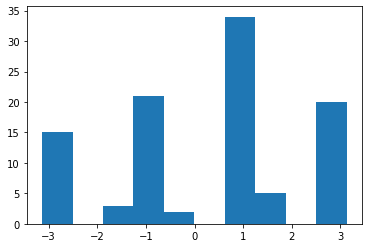

In [81]:
plt.hist(dihedrals_reverse_apo)

In [5]:
indices_old = [669, 670, 673, 676]
indices_new = [669, 670, 673, 681]
dihedrals_forward_apo, dihedrals_reverse_apo = get_dihedrals(i, phase, outdir, htf, indices_new, indices_old)                                       


100%|██████████| 100/100 [00:15<00:00,  6.57it/s]

new files found: 100


#### Get dihedrals for complex

In [6]:
outdir = "/data/chodera/zhangi/perses_benchmark/neq/13/3/"
phase = "complex"
i = os.path.basename(os.path.dirname(outdir))


In [7]:
with open(os.path.join(outdir, f"{i}_{phase}.pickle"), 'rb') as f:
    htf = pickle.load(f)

In [8]:
indices_old = [669, 670, 673, 676]
indices_new = [669, 670, 673, 681]
dihedrals_forward_complex, dihedrals_reverse_complex = get_dihedrals(i, phase, outdir, htf, indices_new, indices_old)                                       


100%|██████████| 100/100 [00:28<00:00,  3.54it/s]

new files found: 100


In [9]:
# Define indicator function
def get_state(dihedral_angle):
    if dihedral_angle > 2 or dihedral_angle < -2: # angle is -3 or +3
        return 0
    elif dihedral_angle < 0 and dihedral_angle > -2: # angle is -1
        return 1
    elif dihedral_angle > 0 and dihedral_angle < 2: # angle is 1
        return 2

In [10]:
# Create list of states for each work traj
states_forward_apo = [get_state(angle) for angle in dihedrals_forward_apo]
states_reverse_apo = [get_state(angle) for angle in dihedrals_reverse_apo]

states_forward_complex = [get_state(angle) for angle in dihedrals_forward_complex]
states_reverse_complex = [get_state(angle) for angle in dihedrals_reverse_complex]

In [11]:
with open(os.path.join(outdir, "state_forward_apo.npy"), "wb") as f:
    np.save(f, states_forward_apo)

with open(os.path.join(outdir, "state_reverse_apo.npy"), "wb") as f:
    np.save(f, states_reverse_apo)

with open(os.path.join(outdir, "state_forward_complex.npy"), "wb") as f:
    np.save(f, states_forward_complex)

with open(os.path.join(outdir, "state_reverse_complex.npy"), "wb") as f:
    np.save(f, states_reverse_complex)

/home/zhangi/miniconda3/envs/perses-sims-oct2020/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/zhangi/miniconda3/envs/perses-sims-oct2020/lib/python3.7/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/home/zhangi/miniconda3/envs/perses-sims-oct2020/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for his

DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmb10' (cmb10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Oblique.ttf) oblique normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXGeneral' (STIXGeneral.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmtt10' (cmtt10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Display' (DejaVuSansDisplay.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymReg.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmss10' (cmss10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager

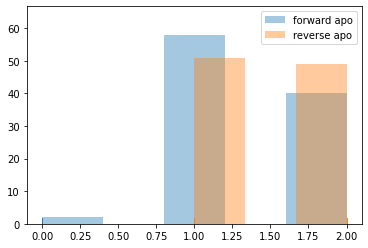

In [12]:
sns.distplot(states_forward_apo, label="forward apo", rug=True, kde=False)
sns.distplot(states_reverse_apo, label="reverse apo", rug=True, kde=False)
# sns.distplot(states_forward_complex, label="forward complex", rug=True, kde=False)
# sns.distplot(states_reverse_complex, label="reverse complex", rug=True, kde=False)
plt.legend()

/home/zhangi/miniconda3/envs/perses-sims-oct2020/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/zhangi/miniconda3/envs/perses-sims-oct2020/lib/python3.7/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/home/zhangi/miniconda3/envs/perses-sims-oct2020/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for his

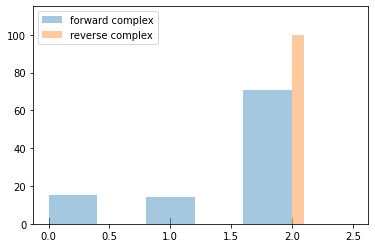

In [13]:
sns.distplot(states_forward_complex, label="forward complex", rug=True, kde=False)
sns.distplot(states_reverse_complex, label="reverse complex", rug=True, kde=False)
plt.legend()

## Run estimator on A42T

In [14]:
from perses.analysis.analysis import Analysis
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pymbar
%matplotlib inline
import os
import itertools
from tqdm import tqdm_notebook
import pandas as pd

INFO:numexpr.utils:Note: detected 72 virtual cores but NumExpr set to maximum of 64, check "NUMEXPR_MAX_THREADS" environment variable.
INFO:numexpr.utils:Note: NumExpr detected 72 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.
DEBUG:matplotlib.pyplot:Loaded backend agg version unknown.
DEBUG:matplotlib.pyplot:Loaded backend module://ipykernel.pylab.backend_inline version unknown.


In [15]:
from simtk.openmm import unit
from openmmtools.constants import kB
KT_KCALMOL = kB * 300 * unit.kelvin / unit.kilocalories_per_mole

In [16]:
# Prep work arrays (from distributed jobs) and call analyze()
# titles = ["T42A", "A42T", "Y29A", "A29Y", "W38F", "F38W", "W44F", "F44W", "Y29F", "F29Y"]
titles = ["A42T"]
d_results = {}
d_phases = {}
first = 3
for i in tqdm_notebook([3]):
    print(f"dir: {i}")
    # Load and combine arrays
    forward_complex_arrays = []
    reverse_complex_arrays = []
    forward_apo_arrays = []
    reverse_apo_arrays = []
    for j in range(100):
        print(f"job: {j}")
        forward_complex_path = f'/data/chodera/zhangi/perses_benchmark/neq/13/{i}/{i}_complex_{j}_forward.npy'
        reverse_complex_path = f'/data/chodera/zhangi/perses_benchmark/neq/13/{i}/{i}_complex_{j}_reverse.npy'
        forward_apo_path = f'/data/chodera/zhangi/perses_benchmark/neq/13/{i}/{i}_apo_{j}_forward.npy'
        reverse_apo_path = f'/data/chodera/zhangi/perses_benchmark/neq/13/{i}/{i}_apo_{j}_reverse.npy'
        if os.path.exists(forward_complex_path):
            with open(forward_complex_path, 'rb') as f:
                array = np.load(f)
                forward_complex_arrays.append(array)
                print(array.shape)
        if os.path.exists(reverse_complex_path):
            with open(reverse_complex_path, 'rb') as f:
                array = np.load(f)
                reverse_complex_arrays.append(array)
                print(array.shape)
        if os.path.exists(forward_apo_path):
            with open(forward_apo_path, 'rb') as f:
                array = np.load(f)
                forward_apo_arrays.append(array)
                print(array.shape)
        if os.path.exists(reverse_apo_path):
            with open(reverse_apo_path, 'rb') as f:
                array = np.load(f)
                print(array.shape)
                reverse_apo_arrays.append(array)


/home/zhangi/miniconda3/envs/perses-sims-oct2020/lib/python3.7/site-packages/ipykernel_launcher.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  import sys


dir: 3
job: 0
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 1
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 2
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 3
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 4
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 5
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 6
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 7
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 8
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 9
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 10
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 11
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 12
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 13
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 14
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 15
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 16
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 17
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250

/home/zhangi/miniconda3/envs/perses-sims-oct2020/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/zhangi/miniconda3/envs/perses-sims-oct2020/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/zhangi/miniconda3/envs/perses-sims-oct2020/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code

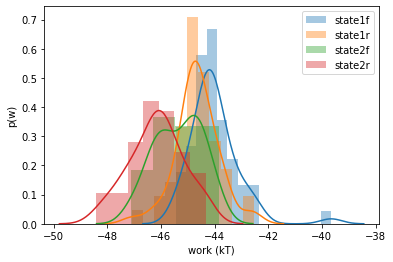

In [17]:
if forward_complex_arrays and reverse_complex_arrays and forward_apo_arrays and reverse_apo_arrays:
    
    # Get forward and reverse accumulated works
    forward_complex_combined = np.concatenate(forward_complex_arrays)
    forward_complex_accumulated = np.array([cycle[-1] - cycle[0] for cycle in forward_complex_combined]) # compute this separately bc the last value of the subsampled array is diff than the actual last sample
    
    reverse_complex_combined = np.concatenate(reverse_complex_arrays)
    reverse_complex_accumulated = np.array([cycle[-1] - cycle[0] for cycle in reverse_complex_combined])
        
    forward_apo_combined = np.concatenate(forward_apo_arrays)
    forward_apo_accumulated = np.array([cycle[-1] - cycle[0] for cycle in forward_apo_combined])

    reverse_apo_combined = np.concatenate(reverse_apo_arrays)
    reverse_apo_accumulated = np.array([cycle[-1] - cycle[0] for cycle in reverse_apo_combined])

    # Prep input for estimator
    d_input_works = {}
    d_input_works['apo'] = {}
    d_input_works['complex'] = {}
    d_input_works['apo']['forward'], d_input_works['apo']['reverse'] = dict(), dict()
    d_input_works['complex']['forward'], d_input_works['complex']['reverse'] = dict(), dict()
    
    # Create lists for each state
    n_states = 3
    for i in range(n_states):
        d_input_works['apo']['forward'][i] = list()
        d_input_works['apo']['reverse'][i] = list()
        d_input_works['complex']['forward'][i] = list()
        d_input_works['complex']['reverse'][i] = list()
    
    n_cycles_apo = len(forward_apo_arrays)
    for i in range(n_cycles_apo):
        state_forward = states_forward_apo[i]
        state_reverse = states_reverse_apo[i]
        d_input_works['apo']['forward'][state_forward].append(forward_apo_accumulated[i])
        d_input_works['apo']['reverse'][state_reverse].append(reverse_apo_accumulated[i])
        
    n_cycles_complex = len(forward_complex_arrays)
    for i in range(n_cycles_complex):
        state_forward = states_forward_complex[i]
        state_reverse = states_reverse_complex[i]
        d_input_works['complex']['forward'][state_forward].append(forward_complex_accumulated[i])
        d_input_works['complex']['reverse'][state_reverse].append(reverse_complex_accumulated[i])

    # Plot work distributions
    for i in [1,2]:
        sns.distplot(np.array(d_input_works['apo']['forward'][i]), label=f"state{i}f")
        sns.distplot(np.array(d_input_works['apo']['reverse'][i])*-1, label=f"state{i}r")
    plt.xlabel("work (kT)")
    plt.ylabel("p(w)")
    plt.legend()
    plt.show()
#     plt.title(f"{title} {phase}")
#     plt.savefig(os.path.join(output_dir, f"{dir_num}_{phase}_work_dist.png"), dpi=500)
#     print(f"saved to: {os.path.join(output_dir, f'{dir_num}_{phase}_work_dist.png')}")
#     plt.clf()    
else:
    print(f"dir {i} has at least one phase without data" )

/home/zhangi/miniconda3/envs/perses-sims-oct2020/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/zhangi/miniconda3/envs/perses-sims-oct2020/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


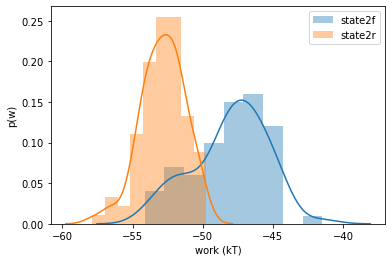

In [18]:
# Plot work distributions
plt.clf()
for i in [2]:
    sns.distplot(np.array(d_input_works['complex']['forward'][i]), label=f"state{i}f")
    sns.distplot(np.array(d_input_works['complex']['reverse'][i])*-1, label=f"state{i}r")
plt.xlabel("work (kT)")
plt.ylabel("p(w)")
plt.legend()
plt.show()

In [19]:
def combine(energies):
    final_sum = 0
    for energy in energies:
        final_sum += np.exp(-energy)
    return -np.log(final_sum)

def compute_ddg(d_works, states_apo, states_complex):
    
    # Initialize data structure for dgs
    d_dgs_state = {"complex": {}, "apo":{}}
    d_dgs_phase = {}

    # Compute and save dgs 
    for phase in phases:
        states = states_apo if phase == 'apo' else states_complex
        for state in states:
            dg, ddg = pymbar.bar.BAR(d_works[phase]['forward'][state], d_works[phase]['reverse'][state])
            d_dgs_state[phase][state] = (dg, ddg)
        d_dgs_phase[phase] = combine([d_dgs_state[phase][state][0] for state in states])

    return d_dgs_state, d_dgs_phase, d_dgs_phase['complex'] - d_dgs_phase['apo']

In [20]:
import tqdm
states_apo = [1, 2]
states_complex = [2]
N_bootstraps = 10000
phases = ['complex', 'apo']
directions = ['forward', 'reverse']
dgs_state_all = []
dgs_phase_all = []
ddgs_all = []
for i in tqdm.trange(N_bootstraps):
    # Initialize data structure for works
    d_works = {"complex": {"forward":{}, "reverse":{}}, "apo":{"forward":{}, "reverse":{}}}
    
    # Save subsampled works
    for phase in phases:
        states = states_apo if phase == 'apo' else states_complex
        for direction in directions:
            for state in states:
                work_array = np.array(d_input_works[phase][direction][state])
                num_samples = work_array.shape[0]
                subsample_indices = np.random.choice(range(num_samples), num_samples)
                d_works[phase][direction][state] = work_array[subsample_indices]
    d_dgs_state, d_dgs_phase, ddg = compute_ddg(d_works, states_apo, states_complex)
    dgs_state_all.append(d_dgs_state)
    dgs_phase_all.append(d_dgs_phase)
    ddgs_all.append(ddg)
    


100%|██████████| 10000/10000 [01:08<00:00, 146.23it/s]


In [21]:
dgs_state_all_A42T = dgs_state_all

/home/zhangi/miniconda3/envs/perses-sims-oct2020/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/zhangi/miniconda3/envs/perses-sims-oct2020/lib/python3.7/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/home/zhangi/miniconda3/envs/perses-sims-oct2020/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for his

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Liberation Sans' (LiberationSans-Bold.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIX' (STIX-Italic.otf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Bold.ttf) normal normal 700 normal>) = 0.33499999999999996
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans' (DejaVuSansCondensed-BoldOblique.ttf) oblique normal 700 condensed>) = 1.535
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans' (DejaVuSansCondensed-Bold.ttf) normal normal 700 condensed>) = 0.5349999999999999
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans' (DejaVuSansCondensed-Oblique.ttf) oblique normal 400 condensed>) = 1.25
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIX' (STIX-Bold.otf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuS

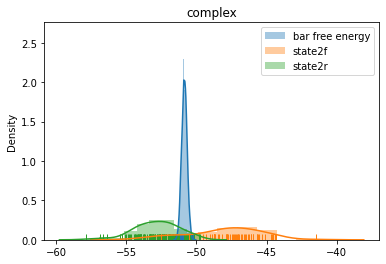

/home/zhangi/miniconda3/envs/perses-sims-oct2020/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/zhangi/miniconda3/envs/perses-sims-oct2020/lib/python3.7/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/home/zhangi/miniconda3/envs/perses-sims-oct2020/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for his

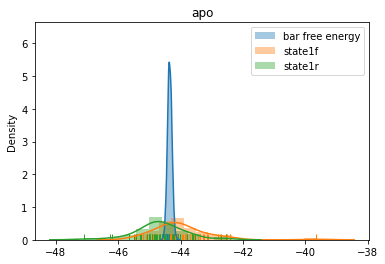

/home/zhangi/miniconda3/envs/perses-sims-oct2020/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/zhangi/miniconda3/envs/perses-sims-oct2020/lib/python3.7/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/home/zhangi/miniconda3/envs/perses-sims-oct2020/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for his

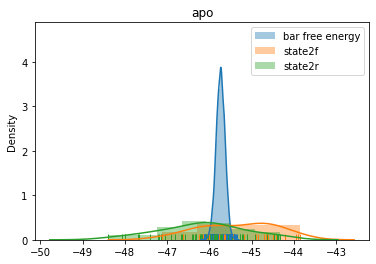

In [22]:
# Plot dgs for each state in apo
for phase in phases:
    states = states_apo if phase == 'apo' else states_complex
    for state in states:
        dgs = [d[phase][state][0] for d in dgs_state_all]
        sns.distplot(dgs, label=f"bar free energy", rug=True)
        sns.distplot(d_input_works[phase]['forward'][state], label=f"state{state}f", rug=True)
        sns.distplot(np.array(d_input_works[phase]['reverse'][state])*-1, label=f"state{state}r", rug=True)
        plt.title(phase)
        plt.legend()
        plt.show()

/home/zhangi/miniconda3/envs/perses-sims-oct2020/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/zhangi/miniconda3/envs/perses-sims-oct2020/lib/python3.7/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

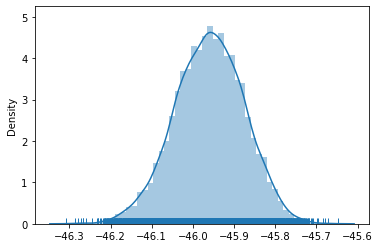

In [23]:
# Plot dgs for apo
dgs_apo = [d['apo'] for d in dgs_phase_all]
sns.distplot(dgs_apo, rug=True)

In [24]:
np.mean(dgs_apo)*KT_KCALMOL

-27.3996577354472

In [25]:
np.std(dgs_apo)*KT_KCALMOL

0.05049675625781538

In [26]:
np.percentile(dgs_apo, 2.5)*KT_KCALMOL, np.percentile(dgs_apo, 97.5)*KT_KCALMOL

(-27.502050811816037, -27.30406808282908)

/home/zhangi/miniconda3/envs/perses-sims-oct2020/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/zhangi/miniconda3/envs/perses-sims-oct2020/lib/python3.7/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

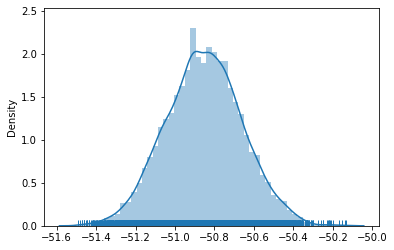

In [27]:
# Plot dgs for complex
dgs_complex = [d['complex'] for d in dgs_phase_all]
sns.distplot(dgs_complex, rug=True)

In [28]:
np.mean(dgs_complex)*KT_KCALMOL

-30.31692208712596

In [29]:
np.std(dgs_complex)*KT_KCALMOL

0.11532735502881034

In [30]:
np.percentile(dgs_complex, 2.5)*KT_KCALMOL, np.percentile(dgs_complex, 97.5)*KT_KCALMOL

(-30.542250546406464, -30.087362571039964)

/home/zhangi/miniconda3/envs/perses-sims-oct2020/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/zhangi/miniconda3/envs/perses-sims-oct2020/lib/python3.7/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

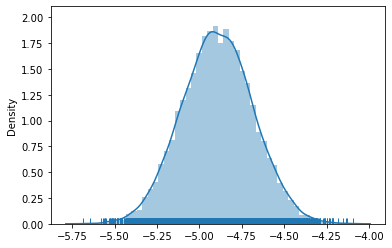

In [31]:
# Plot ddgs
sns.distplot(ddgs_all, rug=True)

In [32]:
np.mean(ddgs_all)*KT_KCALMOL 
# apo = [0, 1, 2] and complex [1, 2] -- -1.74 
# apo = [1, 2] and complex [1, 2] -- -1.74
# apo = [1, 2] and complex [1] -- 0.774
# apo = [1, 2] and complex [2] -- -1.74

-2.917264351678758

In [33]:
np.std(ddgs_all)*KT_KCALMOL

0.12513093061443517

In [34]:
np.percentile(ddgs_all, 2.5)*KT_KCALMOL, np.percentile(ddgs_all, 97.5)*KT_KCALMOL

(-3.1613184211442196, -2.6722276936443623)

## Get states for each work trajectory for T42A

In [35]:
import math
from simtk import unit
import os
import tempfile
import pickle
import mdtraj as md
import numpy as np
from simtk.unit.quantity import Quantity
import logging

# Set up logger
_logger = logging.getLogger()
_logger.setLevel(logging.INFO)

from matplotlib import pyplot as plt
from simtk.openmm import app
from tqdm import tqdm
import argparse
import random
from simtk.openmm.app import Modeller
import seaborn as sns


In [36]:
# Get dihedrals
def get_dihedrals(i, phase, outdir, htf, dihedral_indices_new, dihedral_indices_old):
    # Get topology with solute only
    modeller = Modeller(htf._topology_proposal.old_topology, htf.old_positions(htf.hybrid_positions))
#     modeller.deleteWater()
    old_top = md.Topology.from_openmm(modeller.topology)
    
    # Get last positions from eq positions of each cycle (positions are solute only)
    from tqdm import tqdm
    all_pos_forward = []
    all_pos_reverse = []
    for j in tqdm(range(100)):
        try:
            with open(os.path.join(outdir, f"{i}_{phase}_{j}_forward_neq_old.npy"), "rb") as f:
                all_pos_forward.append(np.load(f)[0])
        except FileNotFoundError:
            pass
        try:
            with open(os.path.join(outdir, f"{i}_{phase}_{j}_reverse_neq_old.npy"), "rb") as f:
                all_pos_reverse.append(np.load(f)[-1])
        except FileNotFoundError:
            pass
    print(f"new files found: {len(all_pos_forward)}")
    
    # Compute dihedrals
    traj = md.Trajectory(np.array(all_pos_forward), old_top)
    dihedrals_forward = md.compute_dihedrals(traj, np.array([dihedral_indices_old]))
    traj = md.Trajectory(np.array(all_pos_reverse), old_top)
    dihedrals_reverse = md.compute_dihedrals(traj, np.array([dihedral_indices_old]))
    
    return dihedrals_forward, dihedrals_reverse

#### Get dihedrals for apo

In [37]:
outdir = "/data/chodera/zhangi/perses_benchmark/neq/13/2/"
phase = "apo"
i = os.path.basename(os.path.dirname(outdir))


In [38]:
with open(os.path.join(outdir, f"{i}_{phase}.pickle"), 'rb') as f:
    htf = pickle.load(f)

In [39]:
indices_old = [669, 670, 673, 674]
indices_new = [669, 670, 673, 676]
dihedrals_forward_apo, dihedrals_reverse_apo = get_dihedrals(i, phase, outdir, htf, indices_new, indices_old)                                       


100%|██████████| 100/100 [00:20<00:00,  4.77it/s]


new files found: 100


#### Get dihedrals for complex

In [40]:
outdir = "/data/chodera/zhangi/perses_benchmark/neq/13/2/"
phase = "complex"
i = os.path.basename(os.path.dirname(outdir))


In [41]:
with open(os.path.join(outdir, f"{i}_{phase}.pickle"), 'rb') as f:
    htf = pickle.load(f)

In [42]:
indices_old = [669, 670, 673, 674]
indices_new = [669, 670, 673, 676]
dihedrals_forward_complex, dihedrals_reverse_complex = get_dihedrals(i, phase, outdir, htf, indices_new, indices_old)                                       


100%|██████████| 100/100 [00:30<00:00,  3.32it/s]


new files found: 100


In [43]:
# Define indicator function
def get_state(dihedral_angle):
    if dihedral_angle > 2 or dihedral_angle < -2: # angle is -3 or +3
        return 0
    elif dihedral_angle < 0 and dihedral_angle > -2: # angle is -1
        return 1
    elif dihedral_angle > 0 and dihedral_angle < 2: # angle is 1
        return 2

In [44]:
# Create list of states for each work traj
states_forward_apo = [get_state(angle) for angle in dihedrals_forward_apo]
states_reverse_apo = [get_state(angle) for angle in dihedrals_reverse_apo]

states_forward_complex = [get_state(angle) for angle in dihedrals_forward_complex]
states_reverse_complex = [get_state(angle) for angle in dihedrals_reverse_complex]

In [45]:
with open(os.path.join(outdir, "state_forward_apo.npy"), "wb") as f:
    np.save(f, states_forward_apo)

with open(os.path.join(outdir, "state_reverse_apo.npy"), "wb") as f:
    np.save(f, states_reverse_apo)

with open(os.path.join(outdir, "state_forward_complex.npy"), "wb") as f:
    np.save(f, states_forward_complex)

with open(os.path.join(outdir, "state_reverse_complex.npy"), "wb") as f:
    np.save(f, states_reverse_complex)

/home/zhangi/miniconda3/envs/perses-sims-oct2020/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/zhangi/miniconda3/envs/perses-sims-oct2020/lib/python3.7/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/home/zhangi/miniconda3/envs/perses-sims-oct2020/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for his

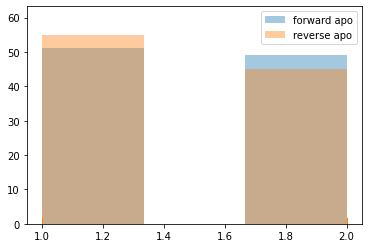

In [46]:
sns.distplot(states_forward_apo, label="forward apo", rug=True, kde=False)
sns.distplot(states_reverse_apo, label="reverse apo", rug=True, kde=False)
# sns.distplot(states_forward_complex, label="forward complex", rug=True, kde=False)
# sns.distplot(states_reverse_complex, label="reverse complex", rug=True, kde=False)
plt.legend()

/home/zhangi/miniconda3/envs/perses-sims-oct2020/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/zhangi/miniconda3/envs/perses-sims-oct2020/lib/python3.7/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/home/zhangi/miniconda3/envs/perses-sims-oct2020/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for his

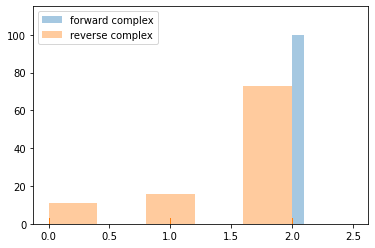

In [47]:
sns.distplot(states_forward_complex, label="forward complex", rug=True, kde=False)
sns.distplot(states_reverse_complex, label="reverse complex", rug=True, kde=False)
plt.legend()

## Run estimator on T42A

In [48]:
from perses.analysis.analysis import Analysis
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pymbar
%matplotlib inline
import os
import itertools
from tqdm import tqdm_notebook
import pandas as pd

In [49]:
from simtk.openmm import unit
from openmmtools.constants import kB
KT_KCALMOL = kB * 300 * unit.kelvin / unit.kilocalories_per_mole

In [50]:
# Prep work arrays (from distributed jobs) and call analyze()
# titles = ["T42A", "A42T", "Y29A", "A29Y", "W38F", "F38W", "W44F", "F44W", "Y29F", "F29Y"]
titles = ["T42A"]
d_results = {}
d_phases = {}
first = 2
for i in tqdm_notebook([2]):
    print(f"dir: {i}")
    # Load and combine arrays
    forward_complex_arrays = []
    reverse_complex_arrays = []
    forward_apo_arrays = []
    reverse_apo_arrays = []
    for j in range(100):
        print(f"job: {j}")
        forward_complex_path = f'/data/chodera/zhangi/perses_benchmark/neq/13/{i}/{i}_complex_{j}_forward.npy'
        reverse_complex_path = f'/data/chodera/zhangi/perses_benchmark/neq/13/{i}/{i}_complex_{j}_reverse.npy'
        forward_apo_path = f'/data/chodera/zhangi/perses_benchmark/neq/13/{i}/{i}_apo_{j}_forward.npy'
        reverse_apo_path = f'/data/chodera/zhangi/perses_benchmark/neq/13/{i}/{i}_apo_{j}_reverse.npy'
        if os.path.exists(forward_complex_path):
            with open(forward_complex_path, 'rb') as f:
                array = np.load(f)
                forward_complex_arrays.append(array)
                print(array.shape)
        if os.path.exists(reverse_complex_path):
            with open(reverse_complex_path, 'rb') as f:
                array = np.load(f)
                reverse_complex_arrays.append(array)
                print(array.shape)
        if os.path.exists(forward_apo_path):
            with open(forward_apo_path, 'rb') as f:
                array = np.load(f)
                forward_apo_arrays.append(array)
                print(array.shape)
        if os.path.exists(reverse_apo_path):
            with open(reverse_apo_path, 'rb') as f:
                array = np.load(f)
                print(array.shape)
                reverse_apo_arrays.append(array)


/home/zhangi/miniconda3/envs/perses-sims-oct2020/lib/python3.7/site-packages/ipykernel_launcher.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  import sys


dir: 2
job: 0
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 1
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 2
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 3
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 4
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 5
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 6
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 7
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 8
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 9
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 10
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 11
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 12
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 13
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 14
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 15
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 16
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250001)
job: 17
(1, 250001)
(1, 250001)
(1, 250001)
(1, 250

/home/zhangi/miniconda3/envs/perses-sims-oct2020/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/zhangi/miniconda3/envs/perses-sims-oct2020/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/zhangi/miniconda3/envs/perses-sims-oct2020/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code

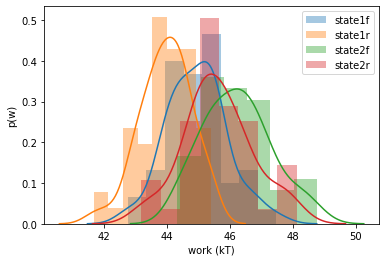

In [51]:
if forward_complex_arrays and reverse_complex_arrays and forward_apo_arrays and reverse_apo_arrays:
    
    # Get forward and reverse accumulated works
    forward_complex_combined = np.concatenate(forward_complex_arrays)
    forward_complex_accumulated = np.array([cycle[-1] - cycle[0] for cycle in forward_complex_combined]) # compute this separately bc the last value of the subsampled array is diff than the actual last sample
    
    reverse_complex_combined = np.concatenate(reverse_complex_arrays)
    reverse_complex_accumulated = np.array([cycle[-1] - cycle[0] for cycle in reverse_complex_combined])
        
    forward_apo_combined = np.concatenate(forward_apo_arrays)
    forward_apo_accumulated = np.array([cycle[-1] - cycle[0] for cycle in forward_apo_combined])

    reverse_apo_combined = np.concatenate(reverse_apo_arrays)
    reverse_apo_accumulated = np.array([cycle[-1] - cycle[0] for cycle in reverse_apo_combined])

    # Prep input for estimator
    d_input_works = {}
    d_input_works['apo'] = {}
    d_input_works['complex'] = {}
    d_input_works['apo']['forward'], d_input_works['apo']['reverse'] = dict(), dict()
    d_input_works['complex']['forward'], d_input_works['complex']['reverse'] = dict(), dict()
    
    # Create lists for each state
    n_states = 3
    for i in range(n_states):
        d_input_works['apo']['forward'][i] = list()
        d_input_works['apo']['reverse'][i] = list()
        d_input_works['complex']['forward'][i] = list()
        d_input_works['complex']['reverse'][i] = list()
    
    n_cycles_apo = len(forward_apo_arrays)
    for i in range(n_cycles_apo):
        state_forward = states_forward_apo[i]
        state_reverse = states_reverse_apo[i]
        d_input_works['apo']['forward'][state_forward].append(forward_apo_accumulated[i])
        d_input_works['apo']['reverse'][state_reverse].append(reverse_apo_accumulated[i])
        
    n_cycles_complex = len(forward_complex_arrays)
    for i in range(n_cycles_complex):
        state_forward = states_forward_complex[i]
        state_reverse = states_reverse_complex[i]
        d_input_works['complex']['forward'][state_forward].append(forward_complex_accumulated[i])
        d_input_works['complex']['reverse'][state_reverse].append(reverse_complex_accumulated[i])

        
    # Plot work distributions
    for i in [1, 2]:
        sns.distplot(np.array(d_input_works['apo']['forward'][i]), label=f"state{i}f")
        sns.distplot(np.array(d_input_works['apo']['reverse'][i])*-1, label=f"state{i}r")
    plt.xlabel("work (kT)")
    plt.ylabel("p(w)")
    plt.legend()
    plt.show()
#     plt.title(f"{title} {phase}")
#     plt.savefig(os.path.join(output_dir, f"{dir_num}_{phase}_work_dist.png"), dpi=500)
#     print(f"saved to: {os.path.join(output_dir, f'{dir_num}_{phase}_work_dist.png')}")
#     plt.clf()    
else:
    print(f"dir {i} has at least one phase without data" )

/home/zhangi/miniconda3/envs/perses-sims-oct2020/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/zhangi/miniconda3/envs/perses-sims-oct2020/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


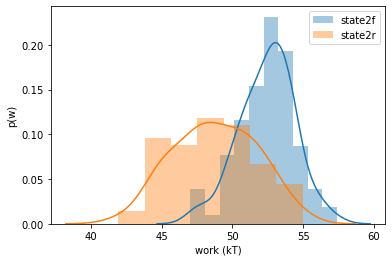

In [52]:
# Plot work distributions
plt.clf()
for i in [2]:
    sns.distplot(np.array(d_input_works['complex']['forward'][i]), label=f"state{i}f")
    sns.distplot(np.array(d_input_works['complex']['reverse'][i])*-1, label=f"state{i}r")
plt.xlabel("work (kT)")
plt.ylabel("p(w)")
plt.legend()
plt.show()

In [53]:
def combine(energies):
    final_sum = 0
    for energy in energies:
        final_sum += np.exp(-energy)
    return -np.log(final_sum)

def compute_ddg(d_works, states_apo, states_complex):
    
    # Initialize data structure for dgs
    d_dgs_state = {"complex": {}, "apo":{}}
    d_dgs_phase = {}

    # Compute and save dgs 
    for phase in phases:
        states = states_apo if phase == 'apo' else states_complex
        for state in states:
            dg, ddg = pymbar.bar.BAR(d_works[phase]['forward'][state], d_works[phase]['reverse'][state])
            d_dgs_state[phase][state] = (dg, ddg)
        d_dgs_phase[phase] = combine([d_dgs_state[phase][state][0] for state in states])

    return d_dgs_state, d_dgs_phase, d_dgs_phase['complex'] - d_dgs_phase['apo']

In [54]:
import tqdm
states_apo = [1, 2]
states_complex = [2]
N_bootstraps = 10000
phases = ['complex', 'apo']
directions = ['forward', 'reverse']
dgs_state_all = []
dgs_phase_all = []
ddgs_all = []
for i in tqdm.trange(N_bootstraps):
    # Initialize data structure for works
    d_works = {"complex": {"forward":{}, "reverse":{}}, "apo":{"forward":{}, "reverse":{}}}
    
    # Save subsampled works
    for phase in phases:
        states = states_apo if phase == 'apo' else states_complex
        for direction in directions:
            for state in states:
                work_array = np.array(d_input_works[phase][direction][state])
                num_samples = work_array.shape[0]
                subsample_indices = np.random.choice(range(num_samples), num_samples)
                d_works[phase][direction][state] = work_array[subsample_indices]
    d_dgs_state, d_dgs_phase, ddg = compute_ddg(d_works, states_apo, states_complex)
    dgs_state_all.append(d_dgs_state)
    dgs_phase_all.append(d_dgs_phase)
    ddgs_all.append(ddg)
    


100%|██████████| 10000/10000 [00:58<00:00, 171.92it/s]


In [55]:
dgs_state_all_T42A = dgs_state_all

/home/zhangi/miniconda3/envs/perses-sims-oct2020/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/zhangi/miniconda3/envs/perses-sims-oct2020/lib/python3.7/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/home/zhangi/miniconda3/envs/perses-sims-oct2020/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for his

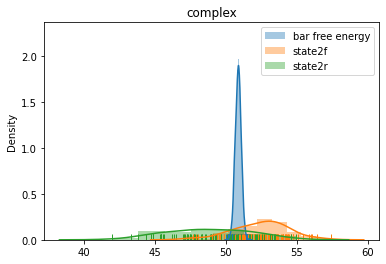

/home/zhangi/miniconda3/envs/perses-sims-oct2020/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/zhangi/miniconda3/envs/perses-sims-oct2020/lib/python3.7/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/home/zhangi/miniconda3/envs/perses-sims-oct2020/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for his

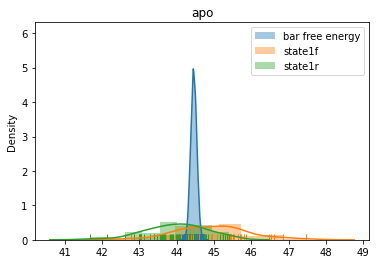

/home/zhangi/miniconda3/envs/perses-sims-oct2020/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/zhangi/miniconda3/envs/perses-sims-oct2020/lib/python3.7/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/home/zhangi/miniconda3/envs/perses-sims-oct2020/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for his

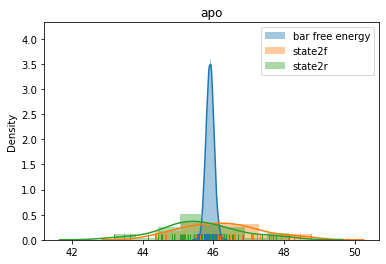

In [56]:
# Plot dgs for each state in apo
for phase in phases:
    states = states_apo if phase == 'apo' else states_complex
    for state in states:
        dgs = [d[phase][state][0] for d in dgs_state_all]
        sns.distplot(dgs, label=f"bar free energy", rug=True)
        sns.distplot(d_input_works[phase]['forward'][state], label=f"state{state}f", rug=True)
        sns.distplot(np.array(d_input_works[phase]['reverse'][state])*-1, label=f"state{state}r", rug=True)
        plt.title(phase)
        plt.legend()
        plt.show()

/home/zhangi/miniconda3/envs/perses-sims-oct2020/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/zhangi/miniconda3/envs/perses-sims-oct2020/lib/python3.7/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

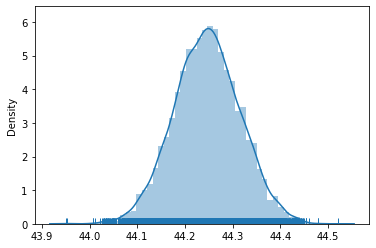

In [57]:
# Plot dgs for apo
dgs_apo = [d['apo'] for d in dgs_phase_all]
sns.distplot(dgs_apo, rug=True)

In [58]:
np.mean(dgs_apo)*KT_KCALMOL

26.377818983198345

In [59]:
np.std(dgs_apo)*KT_KCALMOL

0.04142107753824757

In [60]:
np.percentile(dgs_apo, 2.5)*KT_KCALMOL, np.percentile(dgs_apo, 97.5)*KT_KCALMOL

(26.295850788959648, 26.460563323061212)

/home/zhangi/miniconda3/envs/perses-sims-oct2020/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/zhangi/miniconda3/envs/perses-sims-oct2020/lib/python3.7/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

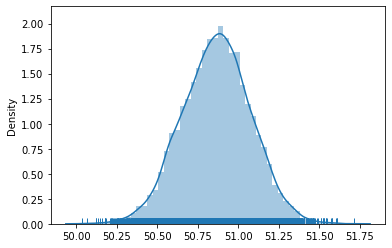

In [61]:
# Plot dgs for complex
dgs_complex = [d['complex'] for d in dgs_phase_all]
sns.distplot(dgs_complex, rug=True)

In [62]:
np.mean(dgs_complex)*KT_KCALMOL

30.323969036127707

In [63]:
np.std(dgs_complex)*KT_KCALMOL

0.12629977917090177

In [64]:
np.percentile(dgs_complex, 2.5)*KT_KCALMOL, np.percentile(dgs_complex, 97.5)*KT_KCALMOL

(30.076562881725547, 30.56924343996026)

/home/zhangi/miniconda3/envs/perses-sims-oct2020/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/zhangi/miniconda3/envs/perses-sims-oct2020/lib/python3.7/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

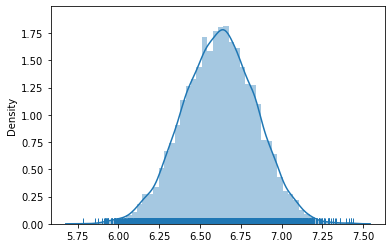

In [65]:
# Plot ddgs
sns.distplot(ddgs_all, rug=True)

In [66]:
np.mean(ddgs_all)*KT_KCALMOL

3.9461500529293656

In [67]:
np.std(ddgs_all)*KT_KCALMOL

0.133122253993722

In [68]:
np.percentile(ddgs_all, 2.5)*KT_KCALMOL, np.percentile(ddgs_all, 97.5)*KT_KCALMOL

(3.679895982927191, 4.205995674550718)

### Compare states A42T vs T42A

/home/zhangi/miniconda3/envs/perses-sims-oct2020/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/zhangi/miniconda3/envs/perses-sims-oct2020/lib/python3.7/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/home/zhangi/miniconda3/envs/perses-sims-oct2020/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for his

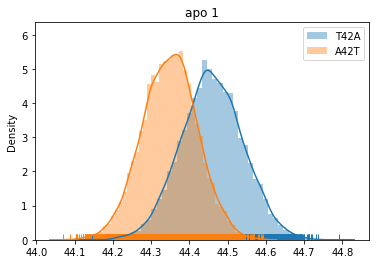

/home/zhangi/miniconda3/envs/perses-sims-oct2020/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/zhangi/miniconda3/envs/perses-sims-oct2020/lib/python3.7/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/home/zhangi/miniconda3/envs/perses-sims-oct2020/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for his

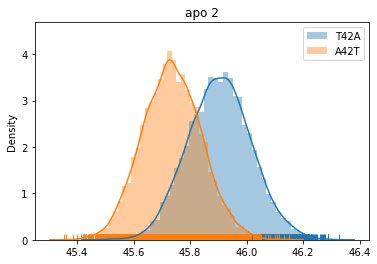

In [69]:
states = [1, 2]
phases = ['apo']
for phase in phases:
    for state in states:
        dgs_T42A = [d[phase][state][0] for d in dgs_state_all_T42A]
        dgs_A42T = [d[phase][state][0] for d in dgs_state_all_A42T]
        sns.distplot(dgs_T42A, label=f"T42A", rug=True)
        sns.distplot(np.array(dgs_A42T)*-1, label=f"A42T", rug=True)
        plt.title(f"{phase} {state}")
        plt.legend()
        plt.show()

/home/zhangi/miniconda3/envs/perses-sims-oct2020/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/zhangi/miniconda3/envs/perses-sims-oct2020/lib/python3.7/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/home/zhangi/miniconda3/envs/perses-sims-oct2020/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for his

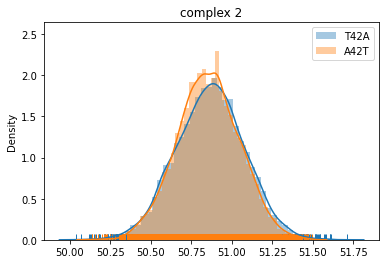

In [70]:
states = [2]
phases = ['complex']
for phase in phases:
    for state in states:
        dgs_T42A = [d[phase][state][0] for d in dgs_state_all_T42A]
        dgs_A42T = [d[phase][state][0] for d in dgs_state_all_A42T]
        sns.distplot(dgs_T42A, label=f"T42A", rug=True)
        sns.distplot(np.array(dgs_A42T)*-1, label=f"A42T", rug=True)
        plt.title(f"{phase} {state}")
        plt.legend()
        plt.show()